In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as stat
%matplotlib inline 

In [5]:
data = pd.read_csv('dataset/historical_data.csv')
data.shape 

(197428, 16)

In [6]:
df = data.copy()
df.shape

(197428, 16)

In [7]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

#### *Feature `created_at` and `actual_delivery_time` has dates but its object type*
### *lets convert those features to datetime format* 

In [9]:
df.dtypes 

market_id                                       float64
created_at                                       object
actual_delivery_time                             object
store_id                                          int64
store_primary_category                           object
order_protocol                                  float64
total_items                                       int64
subtotal                                          int64
num_distinct_items                                int64
min_item_price                                    int64
max_item_price                                    int64
total_onshift_dashers                           float64
total_busy_dashers                              float64
total_outstanding_orders                        float64
estimated_order_place_duration                    int64
estimated_store_to_consumer_driving_duration    float64
dtype: object

In [10]:
df["created_at"] = pd.to_datetime(df["created_at"])
df["actual_delivery_time"] = pd.to_datetime(df["actual_delivery_time"])
df.dtypes

market_id                                              float64
created_at                                      datetime64[ns]
actual_delivery_time                            datetime64[ns]
store_id                                                 int64
store_primary_category                                  object
order_protocol                                         float64
total_items                                              int64
subtotal                                                 int64
num_distinct_items                                       int64
min_item_price                                           int64
max_item_price                                           int64
total_onshift_dashers                                  float64
total_busy_dashers                                     float64
total_outstanding_orders                               float64
estimated_order_place_duration                           int64
estimated_store_to_consumer_driving_duration           

In [11]:
df.select_dtypes("object").nunique()

store_primary_category    74
dtype: int64

In [12]:
df.isna().sum()

market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
dtype: int64

#### *Number of Missing cells*

In [13]:
df.isna().sum().sum()

56061

#### *Percent of Missing data* 

In [14]:
missing_data = (df.isna().sum().sum() / df.size) * 100 
f'{round(missing_data, 2)} %'

'1.77 %'

In [15]:
round(1 - (missing_data/100),2)

0.98

In [16]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration'],
      dtype='object')

In [17]:
def get_nunique():
    for i in df.columns:
        print(f"{i} has unique vals : {df[i].nunique()} and missing vals {df[i].isna().sum()}")
        print()
get_nunique()

market_id has unique vals : 6 and missing vals 987

created_at has unique vals : 180985 and missing vals 0

actual_delivery_time has unique vals : 178110 and missing vals 7

store_id has unique vals : 6743 and missing vals 0

store_primary_category has unique vals : 74 and missing vals 4760

order_protocol has unique vals : 7 and missing vals 995

total_items has unique vals : 57 and missing vals 0

subtotal has unique vals : 8368 and missing vals 0

num_distinct_items has unique vals : 20 and missing vals 0

min_item_price has unique vals : 2312 and missing vals 0

max_item_price has unique vals : 2652 and missing vals 0

total_onshift_dashers has unique vals : 172 and missing vals 16262

total_busy_dashers has unique vals : 159 and missing vals 16262

total_outstanding_orders has unique vals : 281 and missing vals 16262

estimated_order_place_duration has unique vals : 98 and missing vals 0

estimated_store_to_consumer_driving_duration has unique vals : 1336 and missing vals 526



#### *Our Target here is to find `estimated_time_for_delivery`*

***for a giveen delivery we have to predict the `total_delivery_seconds`***

**Start : `created_at`**
 
**End : `actaul_delivery_time`**

**target_varibale will be**
 
`total seconds value between 'created_at' and 'actaul_delivery_time'`

In [18]:
df["delivery_time"] = df["actual_delivery_time"] - df["created_at"]
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_time
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,0 days 01:02:59
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,0 days 01:07:04
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,0 days 00:29:41
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,0 days 00:51:15
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,0 days 00:39:50


In [19]:
df["delivery_time"] = df["delivery_time"].dt.total_seconds()
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_time
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0


In [20]:
cat_features = df.dtypes[df.dtypes == "object"].index
cat_features

Index(['store_primary_category'], dtype='object')

In [21]:
num_features = df.dtypes[df.dtypes != "object"].index
num_features

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'order_protocol', 'total_items', 'subtotal', 'num_distinct_items',
       'min_item_price', 'max_item_price', 'total_onshift_dashers',
       'total_busy_dashers', 'total_outstanding_orders',
       'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration', 'delivery_time'],
      dtype='object')

In [22]:
num_df = df[num_features]
num_df.head()

,market_id,created_at,actual_delivery_time,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_time
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0


In [23]:
num_df.describe()

,market_id,created_at,actual_delivery_time,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_time
count,196441.000000,197428,197421,197428.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,197428.000000,196902.000000,1.974210e+05
mean,2.978706,2015-02-04 22:00:09.537962752,2015-02-04 22:48:23.348914432,3530.510272,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065,308.560179,545.358935,2.908257e+03
min,1.000000,2014-10-19 05:24:15,2015-01-21 15:58:11,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000,1.010000e+02
25%,2.000000,2015-01-29 02:32:42,2015-01-29 03:22:29,1686.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000,2.104000e+03
50%,3.000000,2015-02-05 03:29:09.500000,2015-02-05 04:40:41,3592.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000,2.660000e+03
75%,4.000000,2015-02-12 01:39:18.500000,2015-02-12 02:25:26,5299.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000,3.381000e+03
max,6.000000,2015-02-18 06:00:44,2015-02-19 22:45:31,6987.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000,8.516859e+06
std,1.524867,NaN,NaN,2053.496711,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830,90.139653,219.352902,1.922961e+04


In [24]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration', 'delivery_time'],
      dtype='object')

In [25]:
df["market_id"].isna().sum()

987

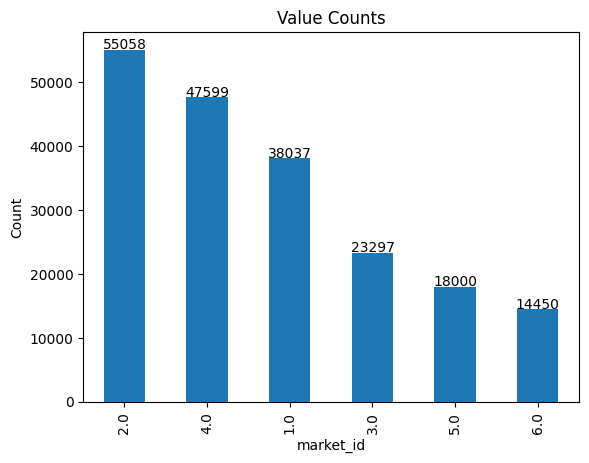

In [26]:
fig , ax = plt.subplots()
ax = df["market_id"].value_counts().plot(kind='bar')
patches = ax.patches 
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width() / 2 
    y = patches[i].get_height() + 100
    ax.annotate(df["market_id"].value_counts().values[i], (x,y),ha='center')
    ax.set(title='Value Counts', ylabel='Count')

#### *Filling missing values*

In [27]:
df["market_id"] = df["market_id"].fillna(df["market_id"].mode()[0])
df["market_id"].isna().sum()

0

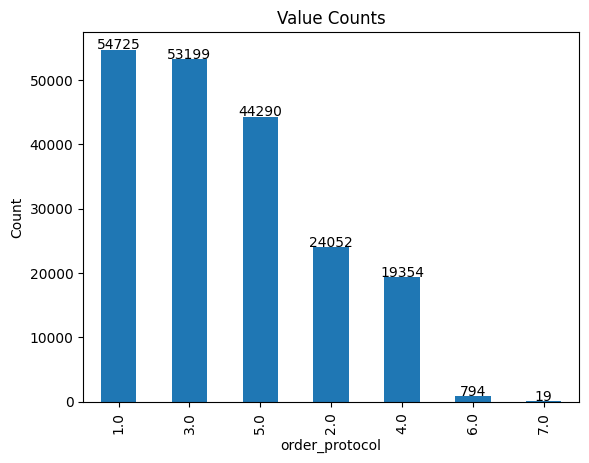

In [28]:
fig , ax = plt.subplots()
ax = df["order_protocol"].value_counts().plot(kind='bar')
patches = ax.patches 
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width() / 2 
    y = patches[i].get_height() + 100
    ax.annotate(df["order_protocol"].value_counts().values[i], (x,y),ha='center')
    ax.set(title='Value Counts', ylabel='Count')

In [29]:
df["order_protocol"] = df["order_protocol"].fillna(df["order_protocol"].mode()[0])
df["order_protocol"].isna().sum()

0

In [30]:
df.isna().sum()

market_id                                           0
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4760
order_protocol                                      0
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
delivery_time                                       7
dtype: int64

In [31]:
df["store_primary_category"].unique()

array(['american', 'mexican', nan, 'indian', 'italian', 'sandwich',
       'thai', 'cafe', 'salad', 'pizza', 'chinese', 'singaporean',
       'burger', 'breakfast', 'mediterranean', 'japanese', 'greek',
       'catering', 'filipino', 'convenience-store', 'other', 'korean',
       'vegan', 'asian', 'barbecue', 'fast', 'dessert', 'smoothie',
       'seafood', 'vietnamese', 'cajun', 'steak', 'middle-eastern',
       'soup', 'vegetarian', 'persian', 'nepalese', 'sushi',
       'latin-american', 'hawaiian', 'chocolate', 'burmese', 'british',
       'pasta', 'alcohol', 'dim-sum', 'peruvian', 'turkish', 'malaysian',
       'ethiopian', 'afghan', 'bubble-tea', 'german', 'french',
       'caribbean', 'gluten-free', 'comfort-food', 'gastropub',
       'pakistani', 'moroccan', 'spanish', 'southern', 'tapas', 'russian',
       'brazilian', 'european', 'cheese', 'african', 'argentine',
       'kosher', 'irish', 'lebanese', 'belgian', 'indonesian',
       'alcohol-plus-food'], dtype=object)

In [32]:
df["store_primary_category"].value_counts()[:20]

store_primary_category
american         19399
pizza            17321
mexican          17099
burger           10958
sandwich         10060
chinese           9421
japanese          9196
dessert           8773
fast              7372
indian            7314
thai              7225
italian           7179
vietnamese        6095
mediterranean     5512
breakfast         5425
other             3988
salad             3745
greek             3326
seafood           2730
barbecue          2722
Name: count, dtype: int64

In [33]:
df.groupby(["store_primary_category","store_id"])["store_id"].size().sort_values(ascending=False)[:20]

store_primary_category  store_id
mexican                 6865        886
american                1311        815
mexican                 314         776
                        1686        723
salad                   3937        666
vietnamese              6917        633
sushi                   6074        596
salad                   4367        553
mediterranean           3748        526
dessert                 6503        521
vietnamese              1409        517
dessert                 6313        510
                        1185        506
chinese                 2056        504
dessert                 6281        500
mexican                 6525        470
                        4210        466
                        1853        465
pizza                   6151        456
burger                  3620        431
Name: store_id, dtype: int64

In [34]:
df[df["store_id"] == 6865].store_primary_category.value_counts()

store_primary_category
mexican              886
chinese                5
japanese               4
dessert                4
burger                 4
fast                   3
pizza                  3
thai                   3
american               2
sandwich               2
smoothie               1
mediterranean          1
african                1
seafood                1
breakfast              1
burmese                1
french                 1
vietnamese             1
indian                 1
dim-sum                1
steak                  1
italian                1
convenience-store      1
greek                  1
other                  1
Name: count, dtype: int64

#### *Filling missing values of `store_primary_category` based on `store_id`*

In [35]:
store_id_unique = df["store_id"].unique().tolist()
store_id_unique[:10]

[1845, 5477, 2841, 4139, 5058, 4149, 3201, 5054, 2004, 1984]

In [36]:
store_id_and_category = {i : df[df["store_id"]==i].store_primary_category.mode() for i in store_id_unique}
store_id_and_category

{1845: 0    american
 Name: store_primary_category, dtype: object,
 5477: 0     indian
 1    mexican
 Name: store_primary_category, dtype: object,
 2841: 0    italian
 Name: store_primary_category, dtype: object,
 4139: 0    mexican
 Name: store_primary_category, dtype: object,
 5058: 0    italian
 Name: store_primary_category, dtype: object,
 4149: 0    sandwich
 1        thai
 Name: store_primary_category, dtype: object,
 3201: 0    cafe
 Name: store_primary_category, dtype: object,
 5054: 0    italian
 Name: store_primary_category, dtype: object,
 2004: 0    american
 Name: store_primary_category, dtype: object,
 1984: 0    chinese
 Name: store_primary_category, dtype: object,
 4905: 0    mexican
 Name: store_primary_category, dtype: object,
 1698: 0    sandwich
 Name: store_primary_category, dtype: object,
 1936: 0    singaporean
 Name: store_primary_category, dtype: object,
 6015: 0    burger
 Name: store_primary_category, dtype: object,
 976: 0    breakfast
 Name: store_primary_c

In [37]:
store_id_and_category[5314].values[0]

'burger'

In [38]:
def fill(store_id):
    try:
        return store_id_and_category[store_id].values[0]
    except:
        return np.nan 
    
df["non_null_primary_category"] = df.store_id.apply(fill)

In [39]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_time,non_null_primary_category
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,american
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,indian
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0,indian
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0,indian
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0,indian


In [40]:
df.isna().sum()

market_id                                           0
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4760
order_protocol                                      0
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
delivery_time                                       7
non_null_primary_category                         867
dtype: int64

In [41]:
df.dropna(axis=0,how='any',inplace=True)
df.isna().sum()

market_id                                       0
created_at                                      0
actual_delivery_time                            0
store_id                                        0
store_primary_category                          0
order_protocol                                  0
total_items                                     0
subtotal                                        0
num_distinct_items                              0
min_item_price                                  0
max_item_price                                  0
total_onshift_dashers                           0
total_busy_dashers                              0
total_outstanding_orders                        0
estimated_order_place_duration                  0
estimated_store_to_consumer_driving_duration    0
delivery_time                                   0
non_null_primary_category                       0
dtype: int64

In [42]:
df.to_csv('dataset/non_null_data.csv') # try using index = False 

In [43]:
data1 = pd.read_csv('dataset/non_null_data.csv')
data1.shape

(176472, 19)

In [44]:
df1 = data1.copy()
df1.shape

(176472, 19)

In [45]:
df1.head()

,Unnamed: 0,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_time,non_null_primary_category
0,0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,american
1,1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,indian
2,8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,5477,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0,1586.0,indian
3,14,1.0,2015-02-12 03:36:46,2015-02-12 04:14:39,2841,italian,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,446,795.0,2273.0,italian
4,15,1.0,2015-01-27 02:12:36,2015-01-27 03:02:24,2841,italian,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,446,205.0,2988.0,italian


In [46]:
df1.drop("Unnamed: 0", axis=1,inplace=True)

# Data Distribution and Boxplot

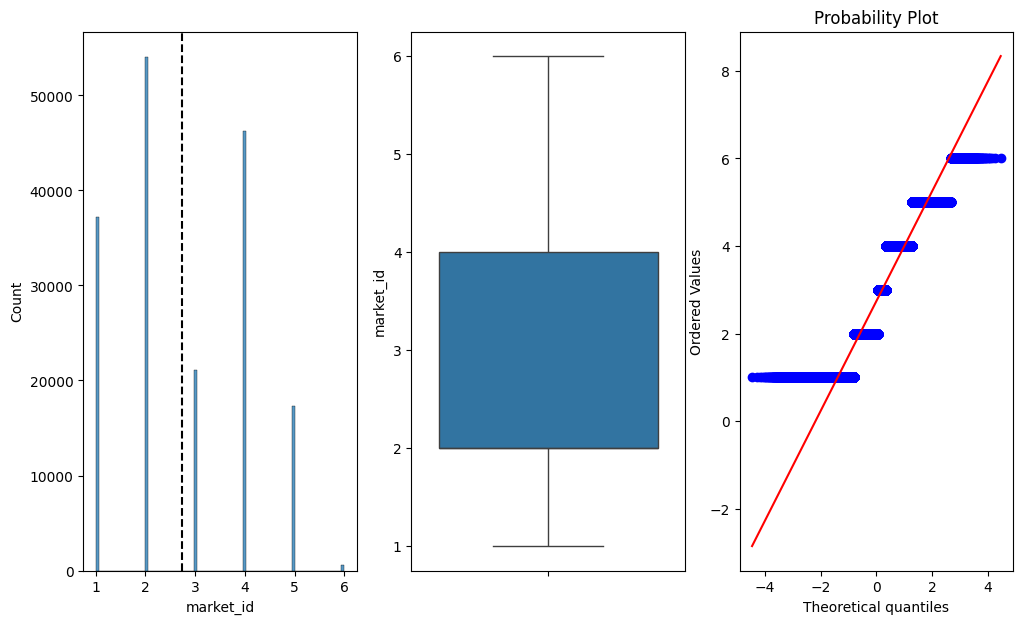

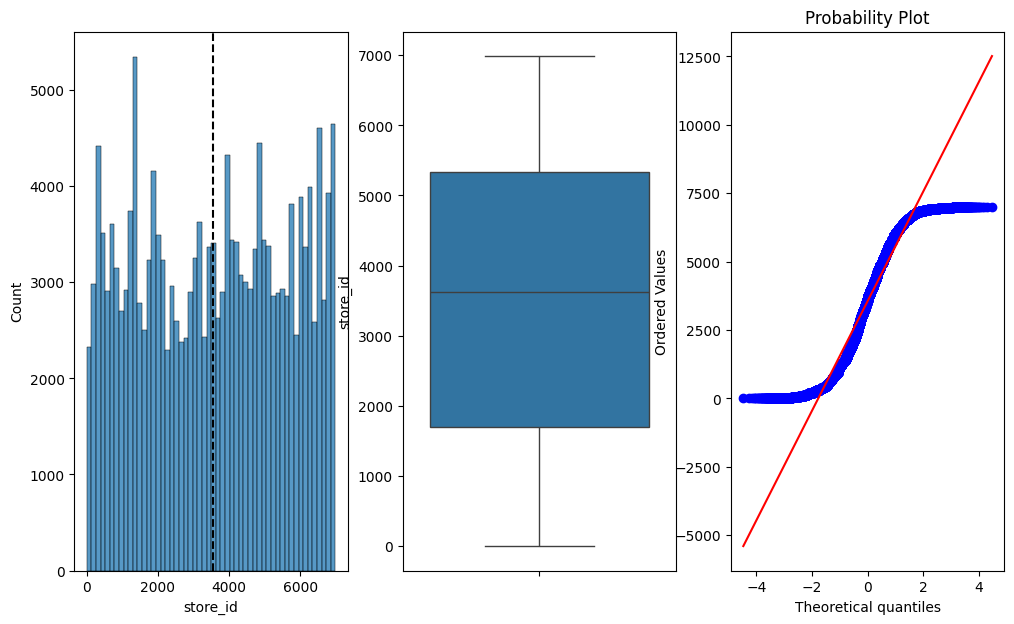

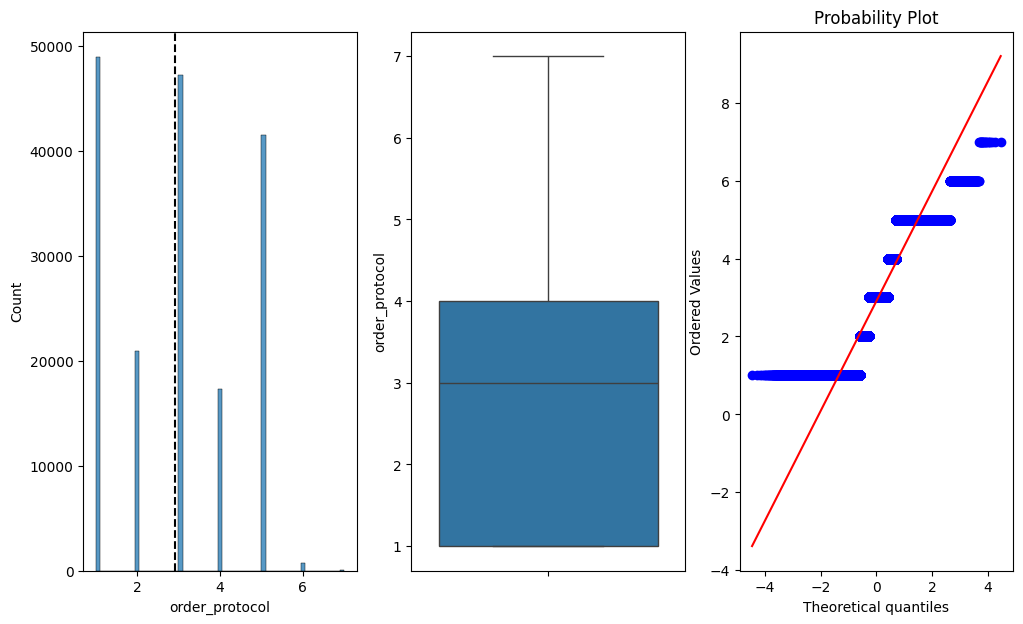

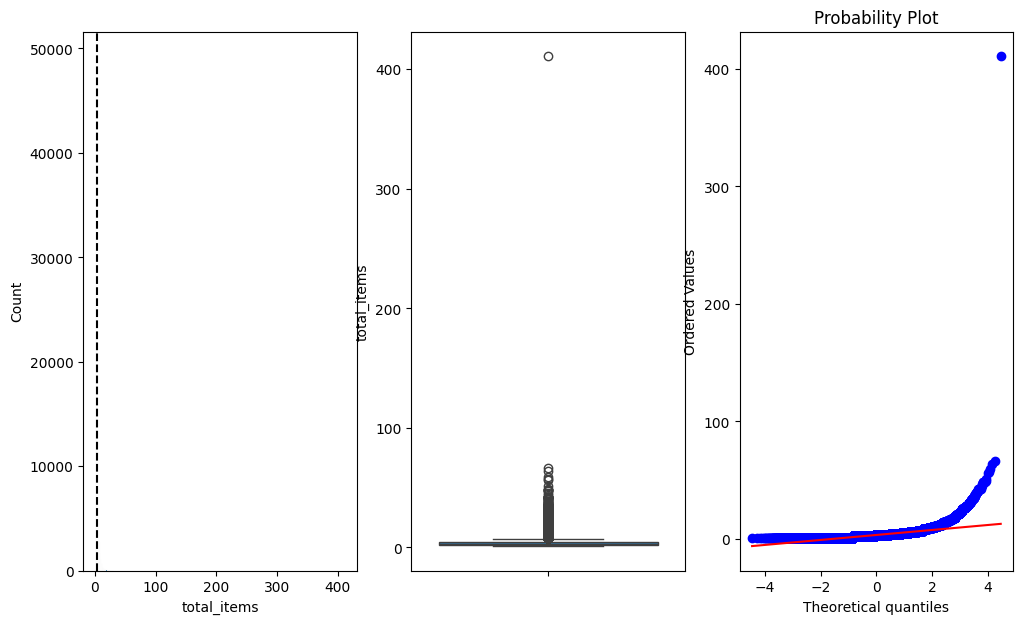

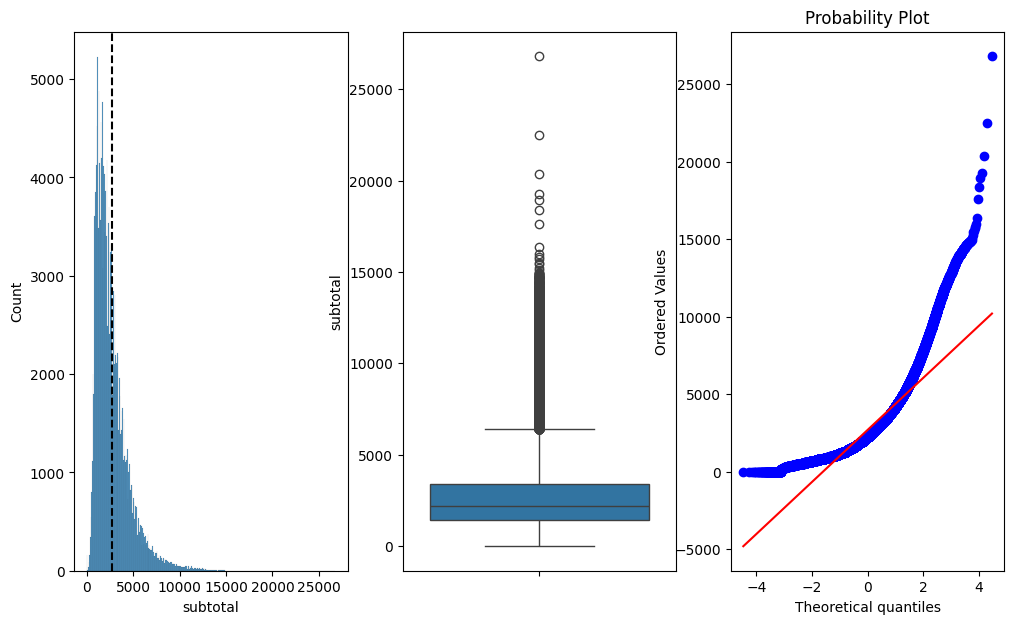

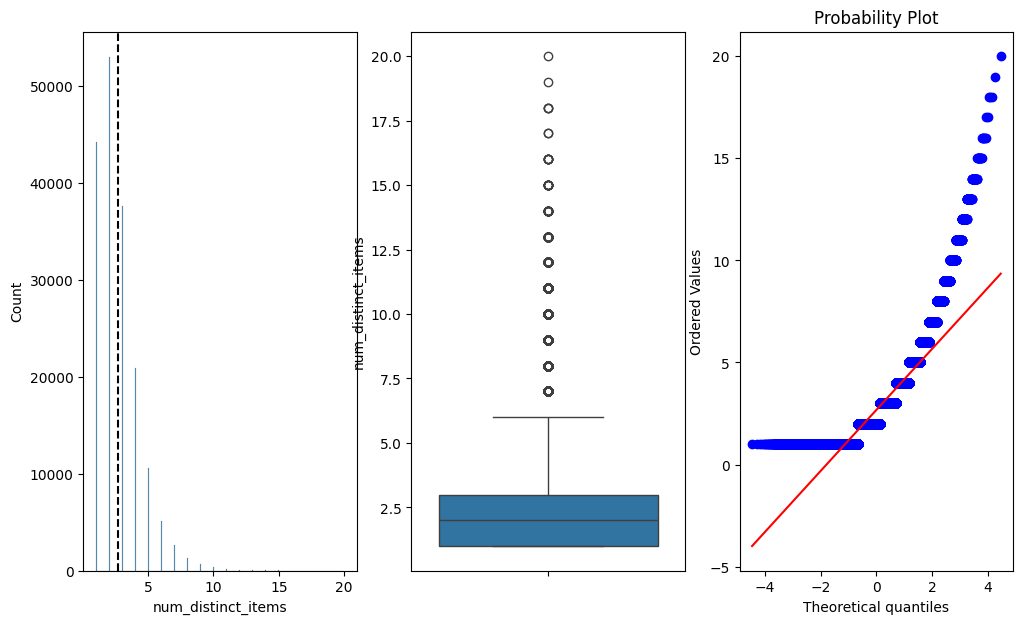

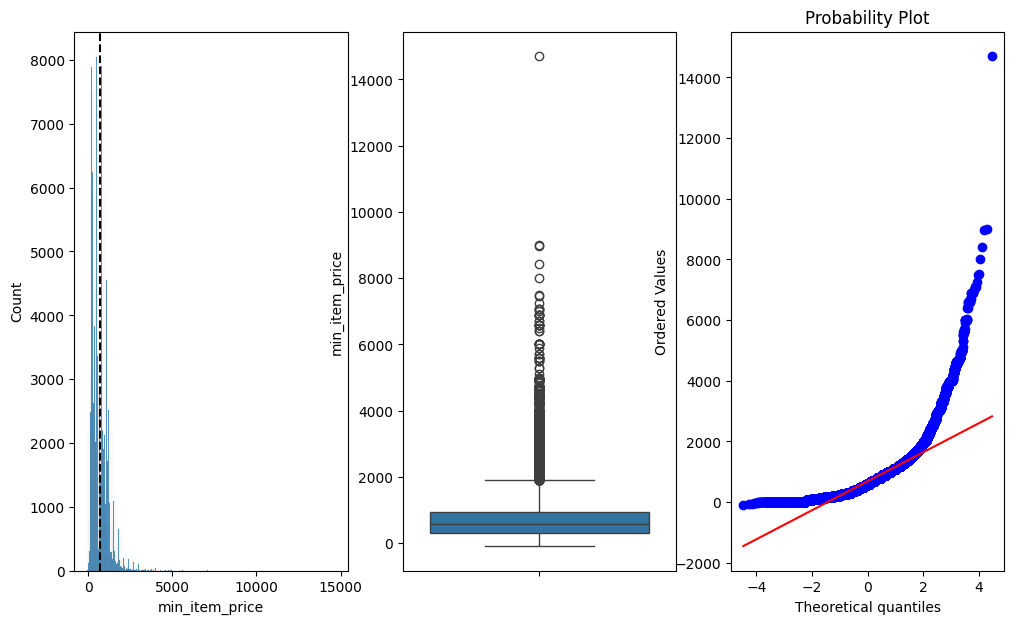

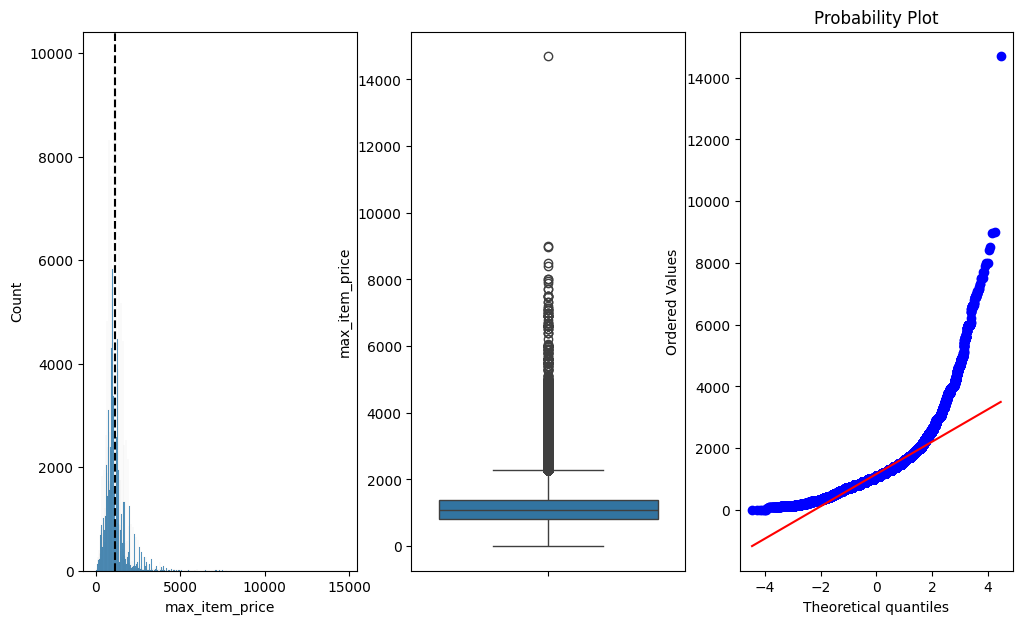

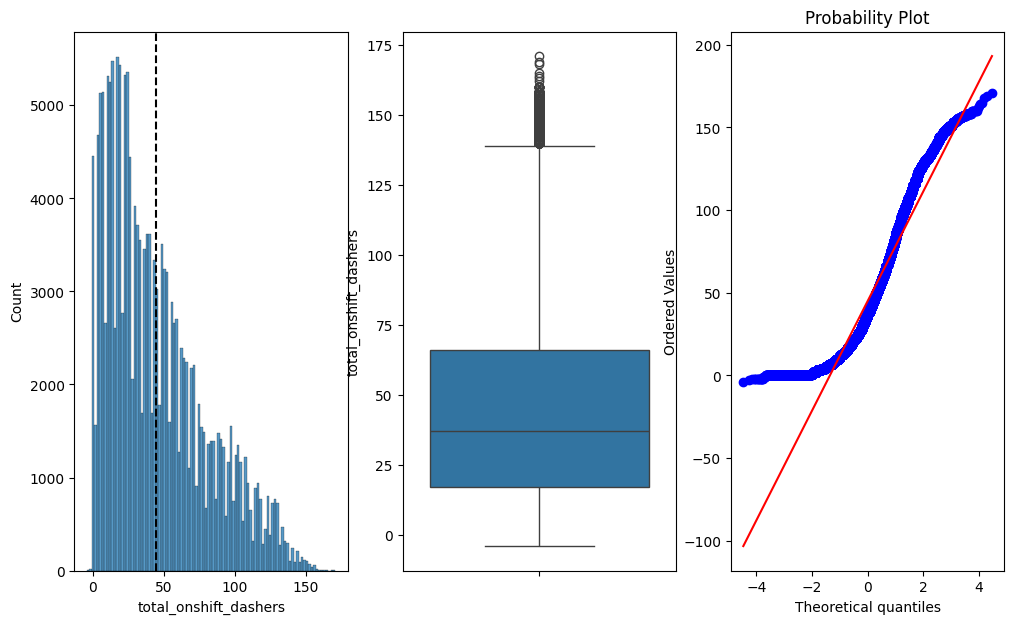

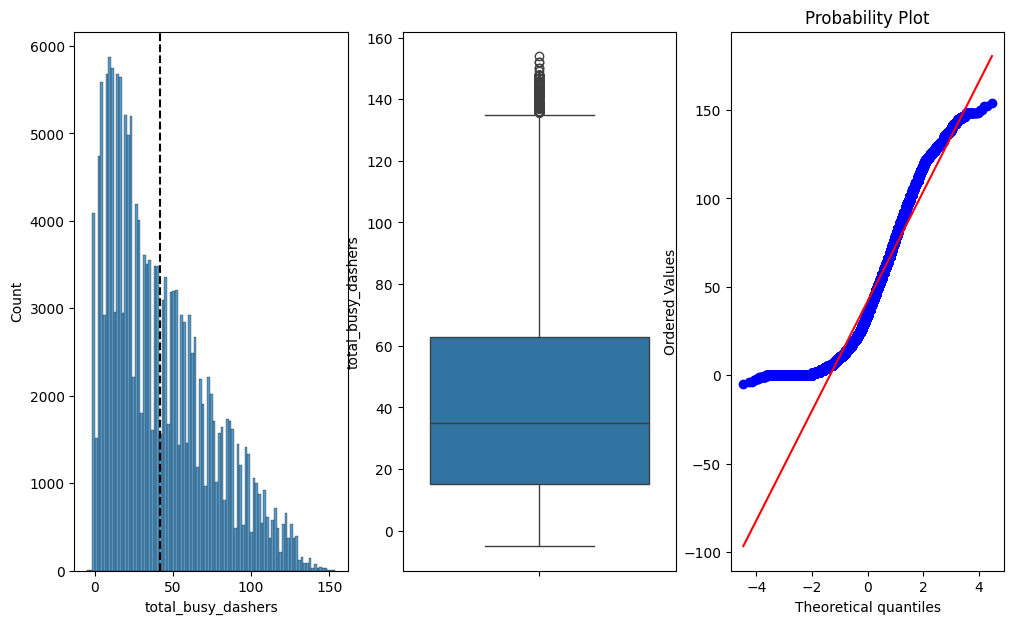

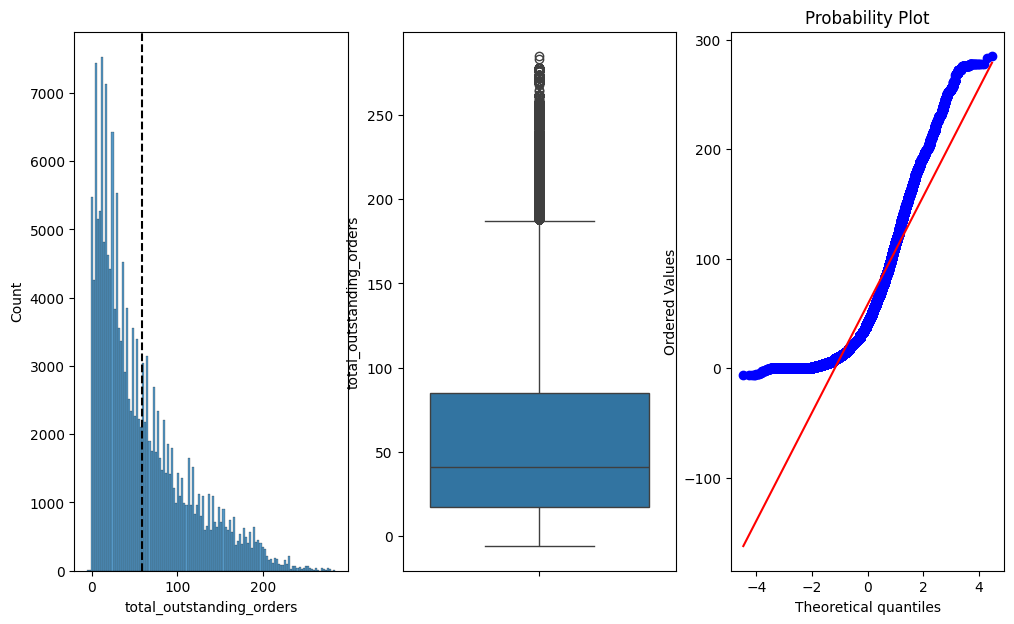

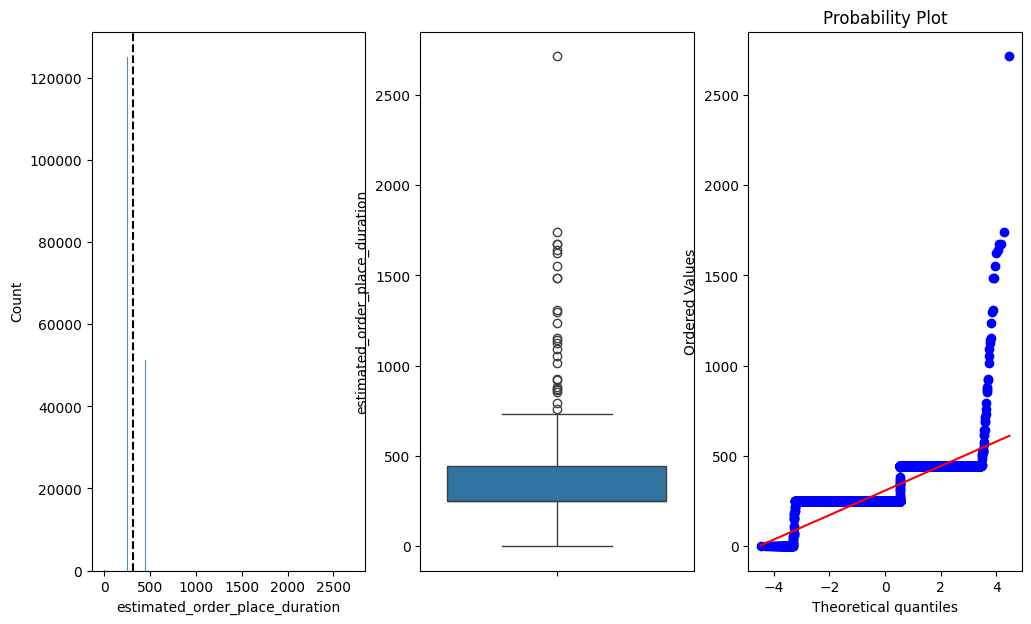

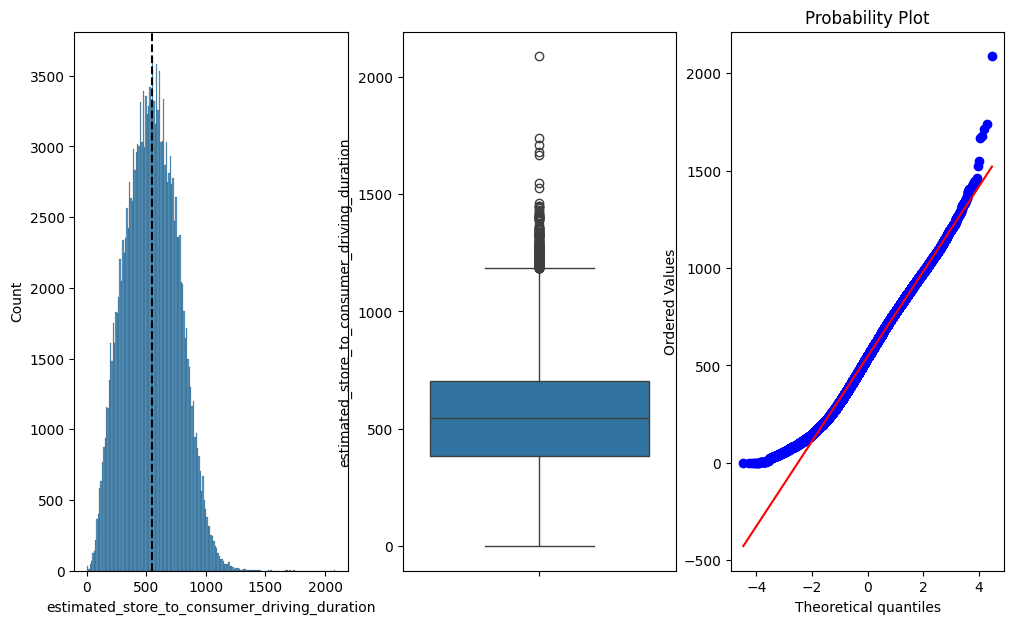

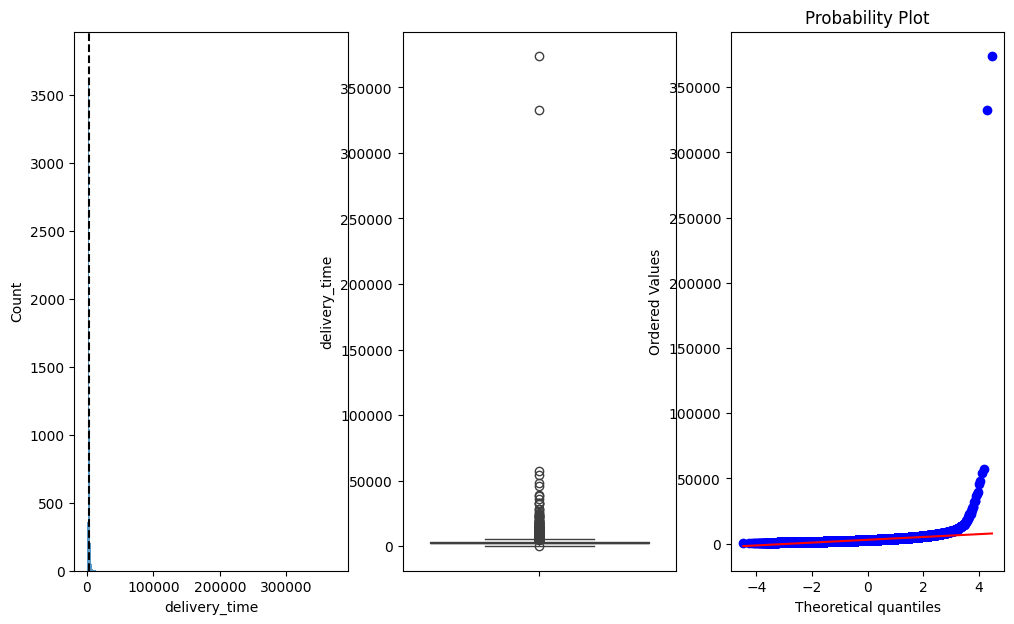

In [47]:
for key , val in df1.items():
    if pd.api.types.is_numeric_dtype(val):
        plt.figure(figsize=(12,7))
        plt.subplot(1,3,1)
        sns.histplot(df[key])
        plt.axvline(df[key].mean(),color='k',linestyle='dashed')
        plt.subplot(1,3,2)
        sns.boxplot(df[key])
        plt.subplot(1,3,3)
        stat.probplot(df[key],plot=plt)


# Observations 
1. As we can see no data is normally distributed 
2. Each feature has many outliers 
3. There are certain features which has extreme outliers like - total_items,                  estimated_order_place_duration and delivery_time

#### `delivery_time` is dependent on `dashers` So

In [48]:
dasher = df1[df1["total_onshift_dashers"] <= 0]
dasher[["total_onshift_dashers","total_busy_dashers","total_outstanding_orders","delivery_time"]]

,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,delivery_time
260,0.0,0.0,0.0,3705.0
261,0.0,0.0,0.0,3262.0
262,0.0,0.0,0.0,1667.0
263,0.0,0.0,0.0,2100.0
264,0.0,0.0,0.0,3705.0
...,...,...,...,...
175853,0.0,0.0,0.0,2907.0
175854,0.0,0.0,0.0,3149.0
175855,0.0,0.0,0.0,5123.0
175856,0.0,0.0,0.0,2273.0


In [49]:
dasher["total_busy_dashers"].unique()

array([ 0.,  2.,  6.,  5.,  1., -1.,  9., 13.,  4.,  8., 24., -4.,  3.,
       29., 12.,  7., 17.])

In [50]:
dasher["total_outstanding_orders"].unique()


array([ 0.,  1., 10.,  2.,  3.,  9.,  6.,  5., 16.,  7.,  4., 11., -4.,
       -1., 22., -3., 12., 13.])

In [51]:
dasher["total_onshift_dashers"].unique()


array([ 0., -2., -1., -3., -4.])

In [52]:
dasher_drop = df1[df1["total_onshift_dashers"] <= 0].index

In [53]:
df1.shape

(176472, 18)

In [54]:
df1.drop(dasher_drop,axis=0,inplace=True)
df1.shape

(172898, 18)

In [55]:
df1[df1["total_onshift_dashers"]<=0]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_time,non_null_primary_category


In [56]:
df1[df1["total_busy_dashers"]<=0]


,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_time,non_null_primary_category
757,1.0,2015-02-02 18:15:17,2015-02-02 18:49:00,1807,vietnamese,4.0,1,825,1,825,825,2.0,0.0,0.0,446,615.0,2023.0,vietnamese
1110,5.0,2015-02-04 17:08:48,2015-02-04 17:44:50,1540,cafe,4.0,2,770,2,275,375,3.0,0.0,0.0,251,161.0,2162.0,cafe
1130,4.0,2015-02-08 15:46:30,2015-02-08 16:12:13,6313,dessert,5.0,2,2840,2,1095,1250,5.0,0.0,0.0,251,503.0,1543.0,dessert
1190,3.0,2015-01-30 06:26:09,2015-01-30 07:19:41,1384,burger,1.0,4,3445,4,340,1085,2.0,0.0,0.0,446,894.0,3212.0,burger
1376,4.0,2015-01-22 16:25:18,2015-01-22 17:20:53,517,american,3.0,1,1025,1,1025,1025,3.0,0.0,2.0,251,480.0,3335.0,american
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172903,3.0,2015-01-22 22:52:52,2015-01-23 00:13:43,4931,burger,1.0,4,2496,4,269,879,1.0,0.0,2.0,446,1009.0,4851.0,burger
172906,3.0,2015-01-24 00:08:00,2015-01-24 01:21:06,4931,burger,1.0,7,4213,5,419,769,2.0,0.0,3.0,446,766.0,4386.0,burger
173400,1.0,2015-02-12 19:01:55,2015-02-12 19:30:45,2788,smoothie,4.0,2,1188,2,489,519,4.0,0.0,0.0,251,165.0,1730.0,smoothie
174974,1.0,2015-01-21 17:35:22,2015-01-21 18:05:51,5201,breakfast,3.0,2,850,2,250,600,3.0,0.0,0.0,251,368.0,1829.0,breakfast


In [57]:
df1["busy_dasher_ratio"] = df1["total_busy_dashers"] / df1["total_onshift_dashers"]
df1.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_time,non_null_primary_category,busy_dasher_ratio
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,american,0.424242
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,indian,2.000000
2,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,5477,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0,1586.0,indian,0.750000
3,1.0,2015-02-12 03:36:46,2015-02-12 04:14:39,2841,italian,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,446,795.0,2273.0,italian,1.200000
4,1.0,2015-01-27 02:12:36,2015-01-27 03:02:24,2841,italian,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,446,205.0,2988.0,italian,1.000000


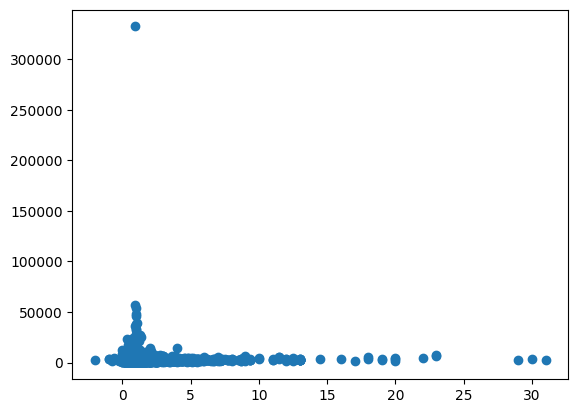

In [58]:
plt.scatter(df1["busy_dasher_ratio"], df1["delivery_time"])

<Axes: xlabel='delivery_time', ylabel='Count'>

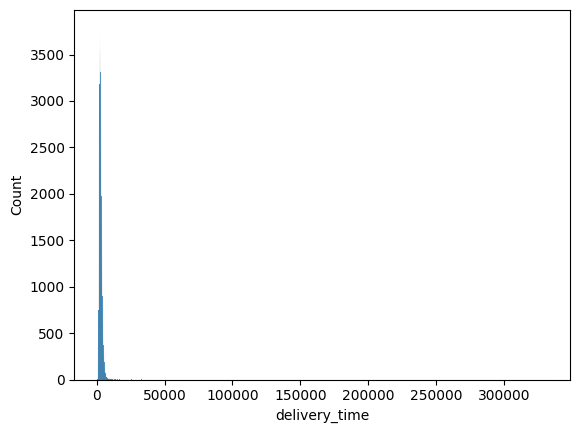

In [59]:
sns.histplot(df1["delivery_time"])

In [60]:
df1["delivery_time"].sort_values(ascending=False)[:5]

24566     332482.0
74143      57032.0
170566     54447.0
77672      48178.0
68368      45685.0
Name: delivery_time, dtype: float64

<Axes: ylabel='delivery_time'>

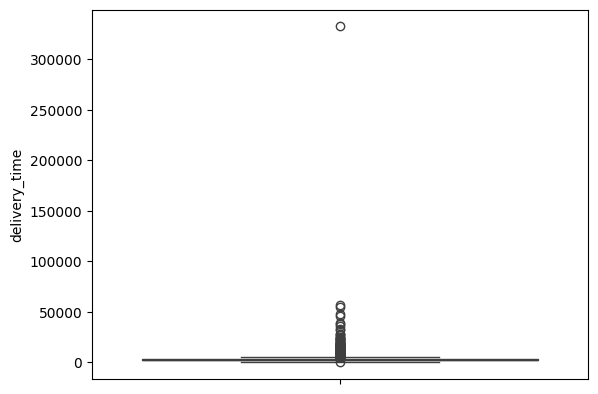

In [61]:
sns.boxplot(df1["delivery_time"])

### *Lets drop extreme outlier from delivery_time*

In [62]:
df1.drop(24566,axis=0,inplace=True)

<Axes: xlabel='delivery_time', ylabel='Count'>

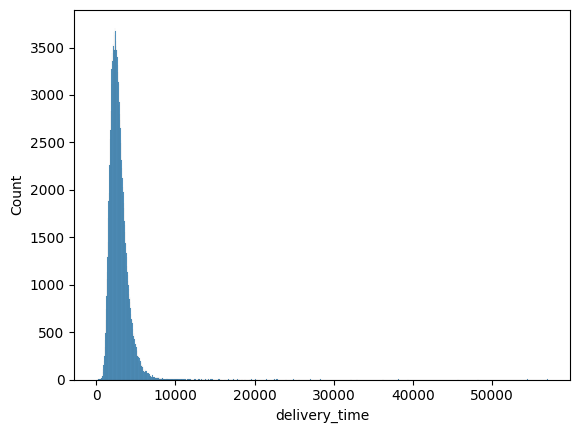

In [63]:
sns.histplot(df1["delivery_time"])

<Axes: ylabel='delivery_time'>

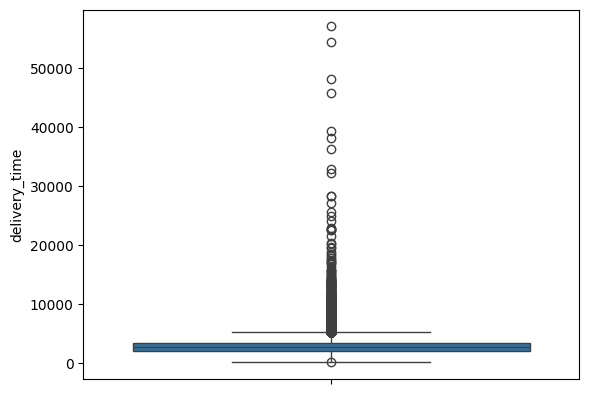

In [64]:
sns.boxplot(df1["delivery_time"])

In [65]:
df1["market_id"].skew()

0.21771210319057896

In [66]:
skew_data = {}
for key, val in df1.items():
    if pd.api.types.is_numeric_dtype(val):
        skew_data[key] = df1[key].skew().round(2)

skew_data

{'market_id': 0.22,
 'store_id': -0.02,
 'order_protocol': 0.11,
 'total_items': 23.6,
 'subtotal': 1.92,
 'num_distinct_items': 1.57,
 'min_item_price': 2.33,
 'max_item_price': 2.21,
 'total_onshift_dashers': 0.86,
 'total_busy_dashers': 0.78,
 'total_outstanding_orders': 1.18,
 'estimated_order_place_duration': 1.19,
 'estimated_store_to_consumer_driving_duration': 0.14,
 'delivery_time': 4.49,
 'busy_dasher_ratio': 20.51}

In [67]:
df1["total_items"].sort_values(ascending=False)[:5]

42149     411
163057     66
163053     64
67258      59
13335      57
Name: total_items, dtype: int64

In [68]:
df1.loc[42149]

market_id                                                       2.0
created_at                                      2015-02-06 00:42:39
actual_delivery_time                            2015-02-06 01:33:34
store_id                                                        777
store_primary_category                                         fast
order_protocol                                                  4.0
total_items                                                     411
subtotal                                                       3115
num_distinct_items                                                5
min_item_price                                                    0
max_item_price                                                  299
total_onshift_dashers                                          35.0
total_busy_dashers                                             35.0
total_outstanding_orders                                       39.0
estimated_order_place_duration                  

In [69]:
df1.drop(42149,axis=0,inplace=True)

In [70]:
cols = []
for key, val in df1.items():
    if pd.api.types.is_numeric_dtype(val):
        cols.append(key)


In [71]:
numeric_df = df1[cols]

### Checking Correlation of each feature w.r.t Target feature 

In [72]:
cor = numeric_df.corr()
cor["delivery_time"].sort_values(ascending=False)

delivery_time                                   1.000000
estimated_store_to_consumer_driving_duration    0.225986
subtotal                                        0.206081
total_outstanding_orders                        0.190150
num_distinct_items                              0.150267
max_item_price                                  0.129486
total_items                                     0.118358
total_busy_dashers                              0.102979
estimated_order_place_duration                  0.100056
total_onshift_dashers                           0.083009
busy_dasher_ratio                               0.059788
min_item_price                                  0.013686
store_id                                       -0.012305
market_id                                      -0.047803
order_protocol                                 -0.072531
Name: delivery_time, dtype: float64

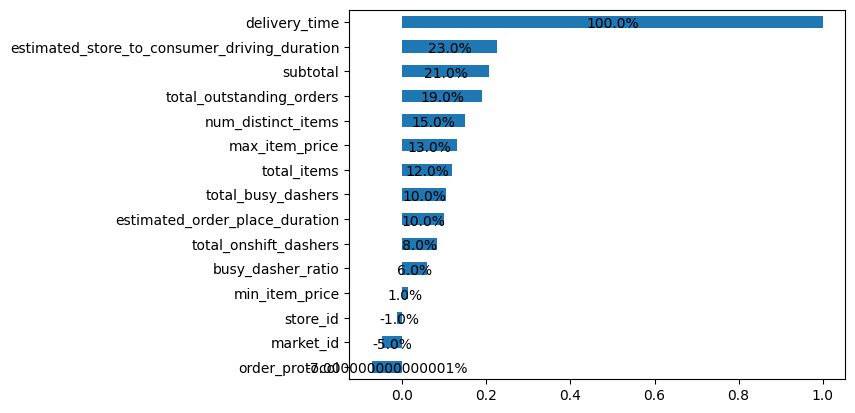

In [73]:
fig , ax = plt.subplots()
ax = cor["delivery_time"].sort_values(ascending=True).plot(kind='barh')
patches = ax.patches 
for i in range(len(patches)):
    x = patches[i].get_width() / 2 
    y = patches[i].get_y() 
    ax.annotate(f"{round(cor['delivery_time'].sort_values(ascending=True).values[i],2)*100}%", (x,y), ha='center')

In [74]:
df1.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_time,non_null_primary_category,busy_dasher_ratio
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,american,0.424242
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,indian,2.000000
2,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,5477,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0,1586.0,indian,0.750000
3,1.0,2015-02-12 03:36:46,2015-02-12 04:14:39,2841,italian,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,446,795.0,2273.0,italian,1.200000
4,1.0,2015-01-27 02:12:36,2015-01-27 03:02:24,2841,italian,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,446,205.0,2988.0,italian,1.000000


In [75]:
df1["created_at"] = pd.to_datetime(df1["created_at"])
df1["actual_delivery_time"] = pd.to_datetime(df1["actual_delivery_time"])

In [76]:
df1["year"] = df1["created_at"].dt.year 
df1["day"] = df1["created_at"].dt.day
df1["time"] = df1["created_at"].dt.hour
df1["week_day"] = df1["created_at"].dt.weekday

In [77]:
df1.head().T

,0,1,2,3,4
market_id,1.0,2.0,2.0,1.0,1.0
created_at,2015-02-06 22:24:17,2015-02-10 21:49:25,2015-02-16 00:11:35,2015-02-12 03:36:46,2015-01-27 02:12:36
actual_delivery_time,2015-02-06 23:27:16,2015-02-10 22:56:29,2015-02-16 00:38:01,2015-02-12 04:14:39,2015-01-27 03:02:24
store_id,1845,5477,5477,2841,2841
store_primary_category,american,mexican,indian,italian,italian
order_protocol,1.0,2.0,3.0,1.0,1.0
total_items,4,1,4,1,2
subtotal,3441,1900,4771,1525,3620
num_distinct_items,4,1,3,1,2
min_item_price,557,1400,820,1525,1425


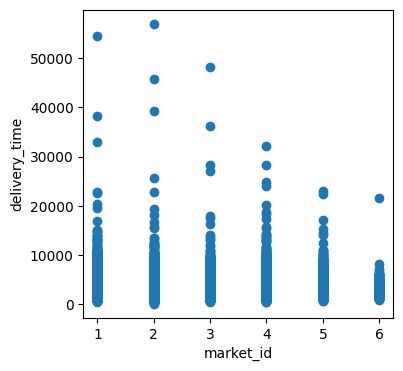

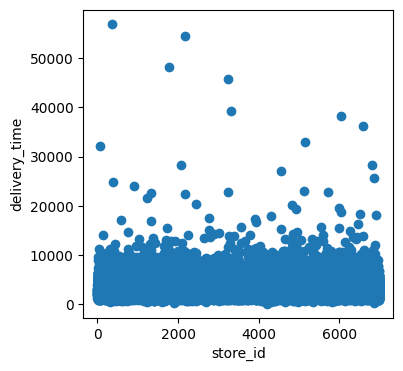

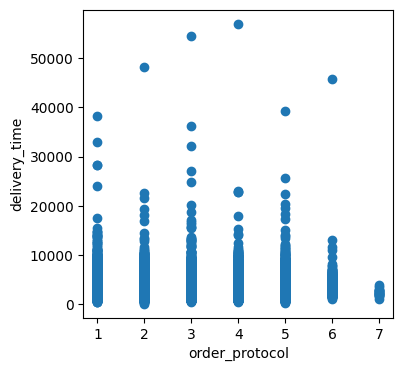

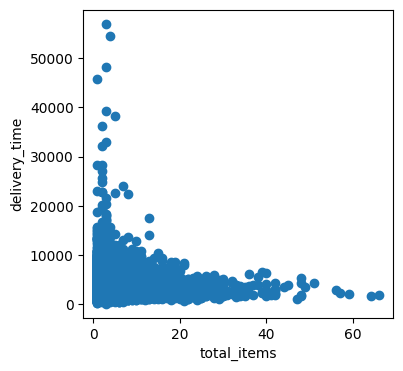

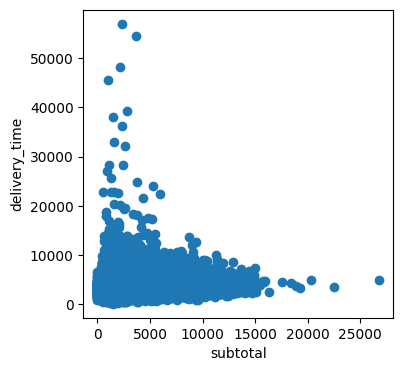

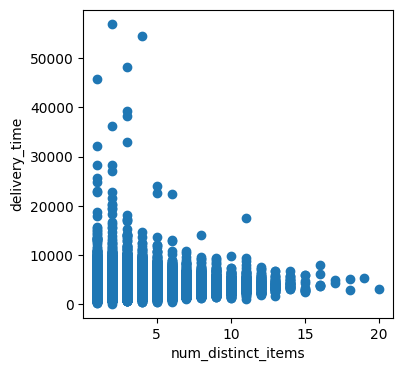

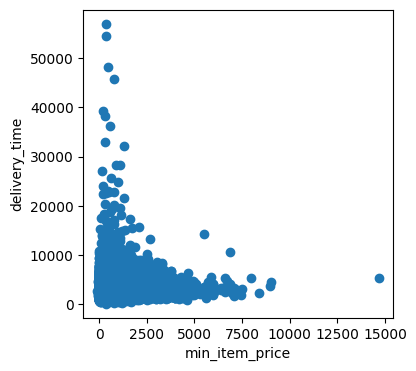

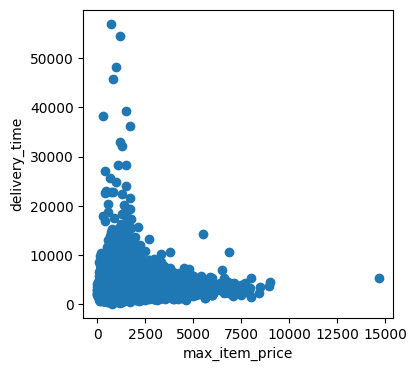

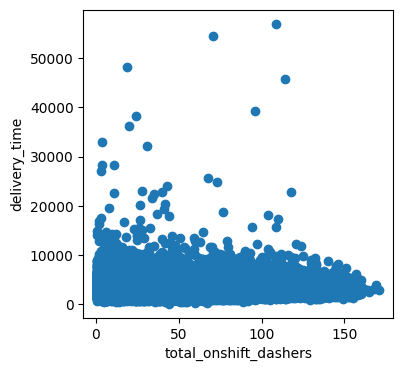

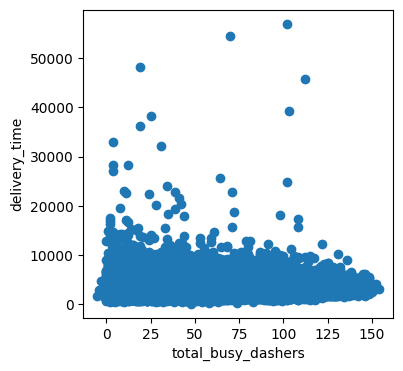

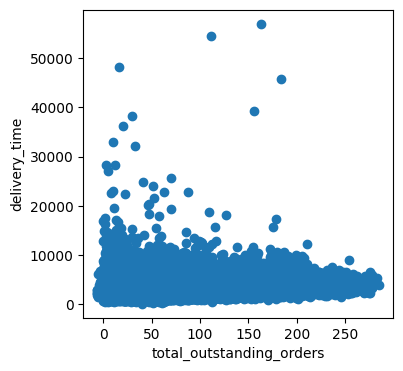

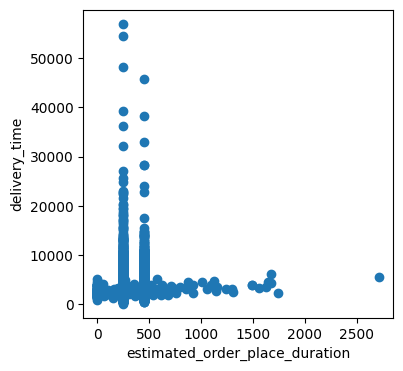

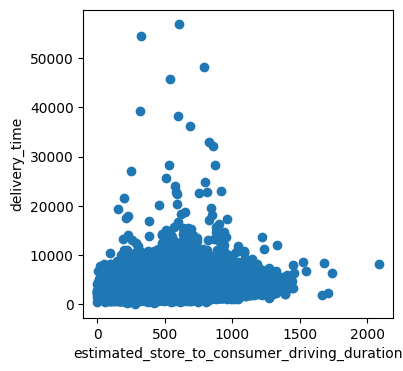

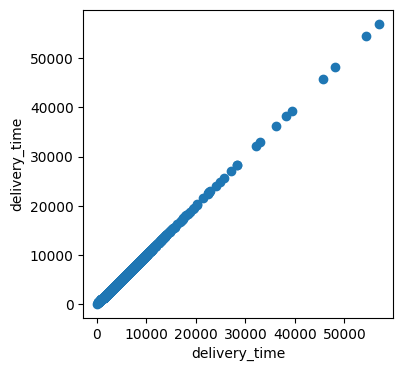

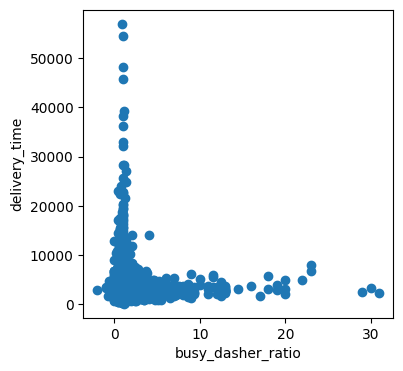

In [78]:
for i in numeric_df.columns:
    plt.figure(figsize=(4,4))
    plt.subplot(1,1,1)
    plt.scatter(numeric_df[i], numeric_df["delivery_time"])
    plt.xlabel(i)
    plt.ylabel("delivery_time")

In [79]:
num_cols = df1.dtypes[df1.dtypes != "object"].index
num_df1 = df1[num_cols]
cor_df1 = num_df1.corr()

In [80]:
cor_df1["delivery_time"].sort_values(ascending=False)

delivery_time                                   1.000000
estimated_store_to_consumer_driving_duration    0.225986
subtotal                                        0.206081
total_outstanding_orders                        0.190150
num_distinct_items                              0.150267
max_item_price                                  0.129486
total_items                                     0.118358
total_busy_dashers                              0.102979
estimated_order_place_duration                  0.100056
total_onshift_dashers                           0.083009
busy_dasher_ratio                               0.059788
actual_delivery_time                            0.038065
created_at                                      0.036405
min_item_price                                  0.013686
week_day                                        0.004111
store_id                                       -0.012305
market_id                                      -0.047803
day                            

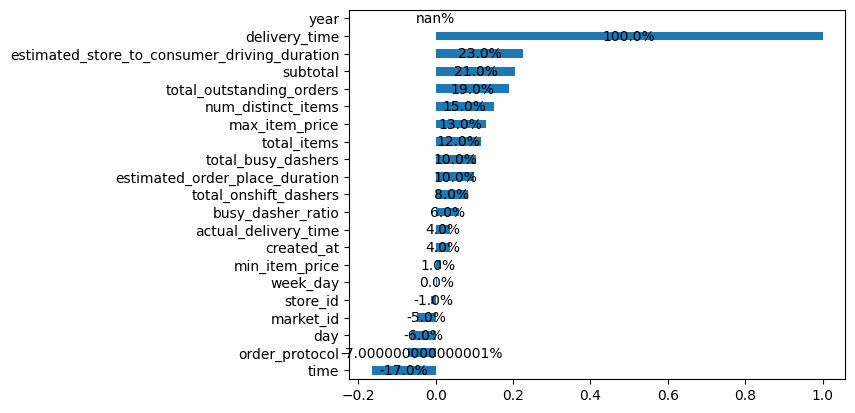

In [81]:
fig , ax = plt.subplots()
ax = cor_df1["delivery_time"].sort_values(ascending=True).plot(kind='barh')
patches = ax.patches 
for i in range(len(patches)):
    x = patches[i].get_width() / 2 
    y = patches[i].get_y() 
    ax.annotate(f"{round(cor_df1['delivery_time'].sort_values(ascending=True).values[i],2)*100}%", (x,y), ha='center')

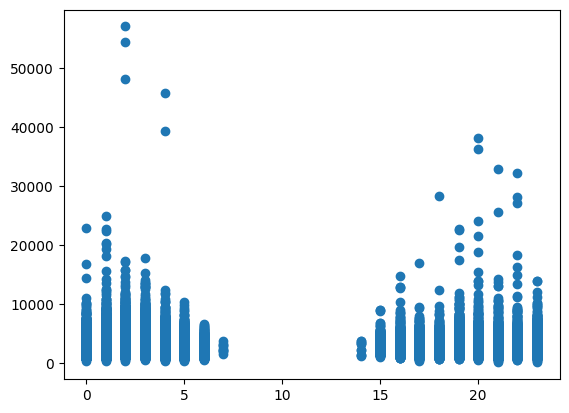

In [82]:
plt.scatter(df1["time"], df1["delivery_time"])

In [83]:
num_df1.drop("year",axis=1,inplace=True)

C:\Users\solat\AppData\Local\Temp\ipykernel_12248\2412009859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df1.drop("year",axis=1,inplace=True)


In [84]:
num_df1.drop(["created_at","actual_delivery_time"],axis=1,inplace=True)

C:\Users\solat\AppData\Local\Temp\ipykernel_12248\1657929907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df1.drop(["created_at","actual_delivery_time"],axis=1,inplace=True)


In [85]:
num_df1.columns

Index(['market_id', 'store_id', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration', 'delivery_time',
       'busy_dasher_ratio', 'day', 'time', 'week_day'],
      dtype='object')

### *Iterating each feature with every other feature and removing redundant features* 

In [86]:
def get_redundant_col(df):
    pairs_to_drop = set()
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((df.columns[i],df.columns[j]))
    return pairs_to_drop 

In [87]:
def get_top_correlated_col(df,n):
    cor = num_df1.corr().abs().unstack()
    label_to_drop = get_redundant_col(df)
    a_cor = cor.drop(labels=label_to_drop).sort_values(ascending=False)
    return a_cor[0:n]

get_top_correlated_col(num_df1,20)

total_onshift_dashers                         total_busy_dashers                0.941678
                                              total_outstanding_orders          0.934576
total_busy_dashers                            total_outstanding_orders          0.931186
total_items                                   num_distinct_items                0.812020
order_protocol                                estimated_order_place_duration    0.682585
subtotal                                      num_distinct_items                0.682307
total_items                                   subtotal                          0.596237
min_item_price                                max_item_price                    0.539665
subtotal                                      max_item_price                    0.509127
num_distinct_items                            min_item_price                    0.447572
total_items                                   min_item_price                    0.417564
total_onshift_dashers

In [88]:
df1.head().T

,0,1,2,3,4
market_id,1.0,2.0,2.0,1.0,1.0
created_at,2015-02-06 22:24:17,2015-02-10 21:49:25,2015-02-16 00:11:35,2015-02-12 03:36:46,2015-01-27 02:12:36
actual_delivery_time,2015-02-06 23:27:16,2015-02-10 22:56:29,2015-02-16 00:38:01,2015-02-12 04:14:39,2015-01-27 03:02:24
store_id,1845,5477,5477,2841,2841
store_primary_category,american,mexican,indian,italian,italian
order_protocol,1.0,2.0,3.0,1.0,1.0
total_items,4,1,4,1,2
subtotal,3441,1900,4771,1525,3620
num_distinct_items,4,1,3,1,2
min_item_price,557,1400,820,1525,1425


In [89]:
df1.drop(["created_at","actual_delivery_time","store_primary_category",
          "busy_dasher_ratio","year","day","week_day","min_item_price","max_item_price"],axis=1,inplace=True)


In [90]:
df1.columns

Index(['market_id', 'store_id', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration', 'delivery_time',
       'non_null_primary_category', 'time'],
      dtype='object')

In [91]:
n = df1.dtypes[df1.dtypes != "object"].index
num_f = df1[n]

<Axes: >

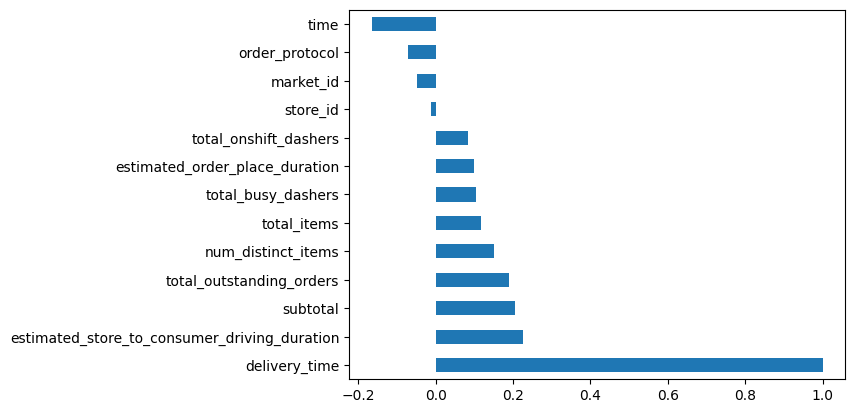

In [92]:
cor_relat = num_f.corr()
cor_relat["delivery_time"].sort_values(ascending=False).plot(kind='barh')

## Data Transformation

In [93]:
from sklearn.preprocessing import PowerTransformer 
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import train_test_split 


In [94]:
df1.head()

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_time,non_null_primary_category,time
0,1.0,1845,1.0,4,3441,4,33.0,14.0,21.0,446,861.0,3779.0,american,22
1,2.0,5477,2.0,1,1900,1,1.0,2.0,2.0,446,690.0,4024.0,indian,21
2,2.0,5477,3.0,4,4771,3,8.0,6.0,18.0,446,289.0,1586.0,indian,0
3,1.0,2841,1.0,1,1525,1,5.0,6.0,8.0,446,795.0,2273.0,italian,3
4,1.0,2841,1.0,2,3620,2,5.0,5.0,7.0,446,205.0,2988.0,italian,2


In [95]:
df1.to_csv('dataset/final_doordash.csv',index=False)

In [96]:
X = df1.drop("delivery_time",axis=1)
y = df1["delivery_time"]


In [97]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape , y_train.shape, y_test.shape

((138316, 13), (34580, 13), (138316,), (34580,))

In [98]:
features = ['total_items', 'subtotal',
       'num_distinct_items', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration',
        'time']

power_transform = Pipeline(steps=[
    ("log",PowerTransformer(method='yeo-johnson'))
])

CT = ColumnTransformer(transformers=[
    ("log", power_transform, features)
],remainder='passthrough')


transformer = Pipeline(steps=[("transform", CT)])
transformer.set_output(transform='pandas')

transformed_Xtrain_data = transformer.fit_transform(X_train)
transformed_Xtest_data = transformer.transform(X_test)


In [99]:
transformed_Xtrain_data

,log__total_items,log__subtotal,log__num_distinct_items,log__total_onshift_dashers,log__total_busy_dashers,log__total_outstanding_orders,log__estimated_order_place_duration,log__estimated_store_to_consumer_driving_duration,log__time,remainder__market_id,remainder__store_id,remainder__order_protocol,remainder__non_null_primary_category
153856,-0.397105,0.060429,-0.226018,1.771130,1.864183,1.879046,-0.611525,0.011760,-0.610146,4.0,4367,2.0,salad
90925,1.059156,1.333535,0.997950,-0.130303,-0.092059,-0.090882,1.520654,-0.942984,1.273931,2.0,4976,1.0,sandwich
44115,0.266858,-0.833721,-0.226018,-0.802265,-0.722374,-0.677123,1.520654,-2.039182,1.311483,6.0,6268,1.0,breakfast
2254,-1.504158,-1.176881,-1.394317,-1.237975,-1.143116,-0.492981,1.520654,1.020360,-0.087514,1.0,5234,1.0,sandwich
154330,1.710643,-0.108714,0.997950,-1.947308,-1.806808,-1.976658,1.520654,0.235641,1.192800,3.0,5135,4.0,middle-eastern
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122277,-0.397105,-0.785102,-0.226018,-0.856352,-1.216351,-1.179298,-0.611525,0.425064,0.092099,1.0,914,3.0,pizza
105828,0.266858,-0.432779,0.494195,-1.485958,-1.469352,-1.485907,1.520654,-1.527911,1.234437,2.0,5577,3.0,salad
134648,-1.504158,-0.462970,-1.394317,0.474650,0.530465,0.968199,-0.611525,-1.002925,-0.610146,4.0,693,3.0,italian
149826,0.266858,0.167368,0.494195,0.855425,0.839513,0.681142,-0.611525,-0.402456,-1.046164,2.0,601,3.0,mexican


In [100]:
transformed_Xtrain_data.columns

Index(['log__total_items', 'log__subtotal', 'log__num_distinct_items',
       'log__total_onshift_dashers', 'log__total_busy_dashers',
       'log__total_outstanding_orders', 'log__estimated_order_place_duration',
       'log__estimated_store_to_consumer_driving_duration', 'log__time',
       'remainder__market_id', 'remainder__store_id',
       'remainder__order_protocol', 'remainder__non_null_primary_category'],
      dtype='object')

In [101]:
log_cols = []
for i in transformed_Xtrain_data.columns:
    if i.startswith("log", 0, 5):
        log_cols.append(i)
log_cols 

['log__total_items',
 'log__subtotal',
 'log__num_distinct_items',
 'log__total_onshift_dashers',
 'log__total_busy_dashers',
 'log__total_outstanding_orders',
 'log__estimated_order_place_duration',
 'log__estimated_store_to_consumer_driving_duration',
 'log__time']

In [102]:
transformed_Xtrain_data[log_cols[1]]

153856    0.060429
90925     1.333535
44115    -0.833721
2254     -1.176881
154330   -0.108714
            ...   
122277   -0.785102
105828   -0.432779
134648   -0.462970
149826    0.167368
124420    0.307479
Name: log__subtotal, Length: 138316, dtype: float64

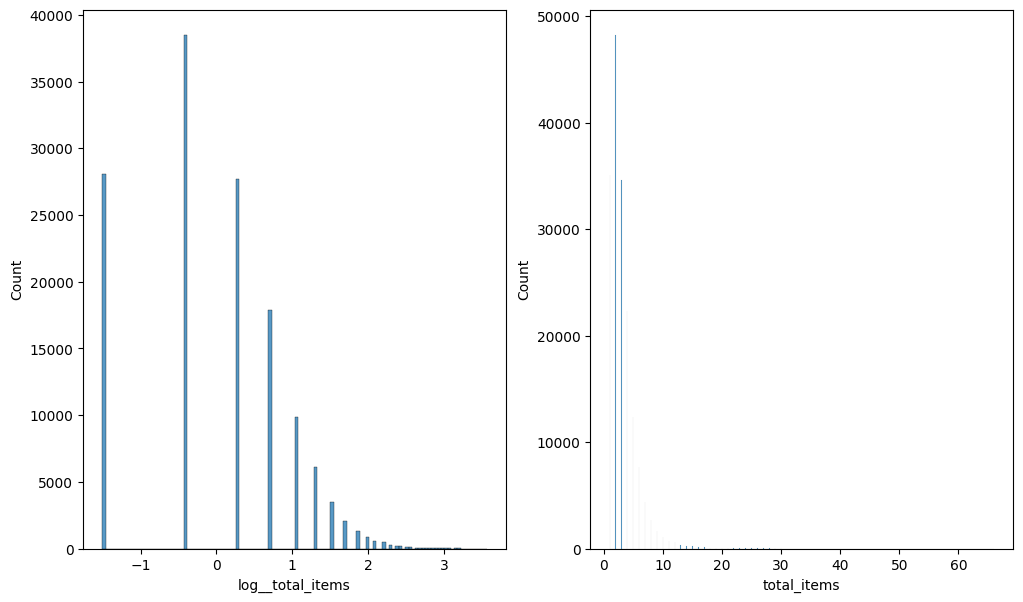

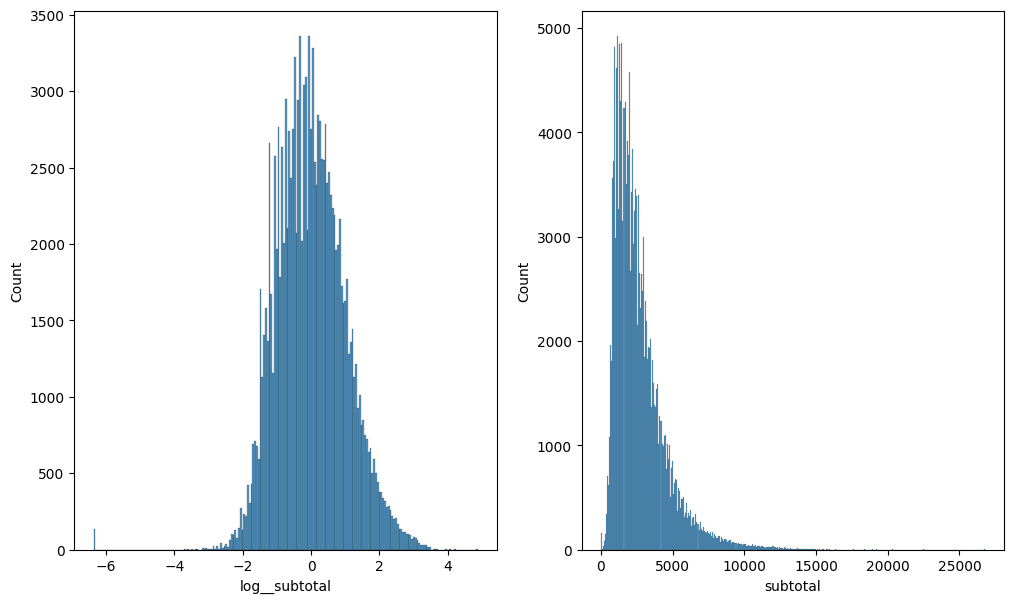

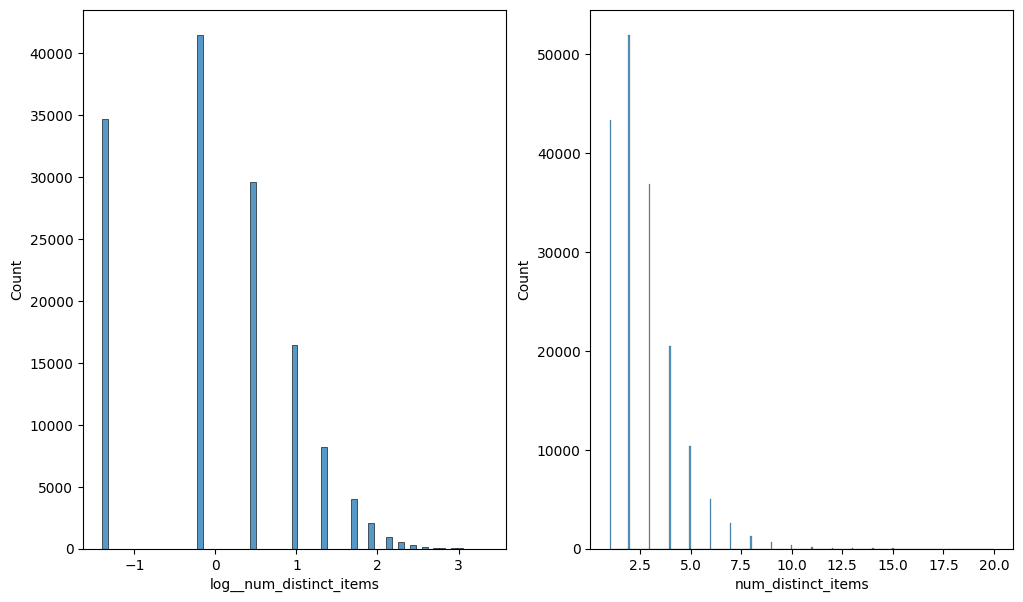

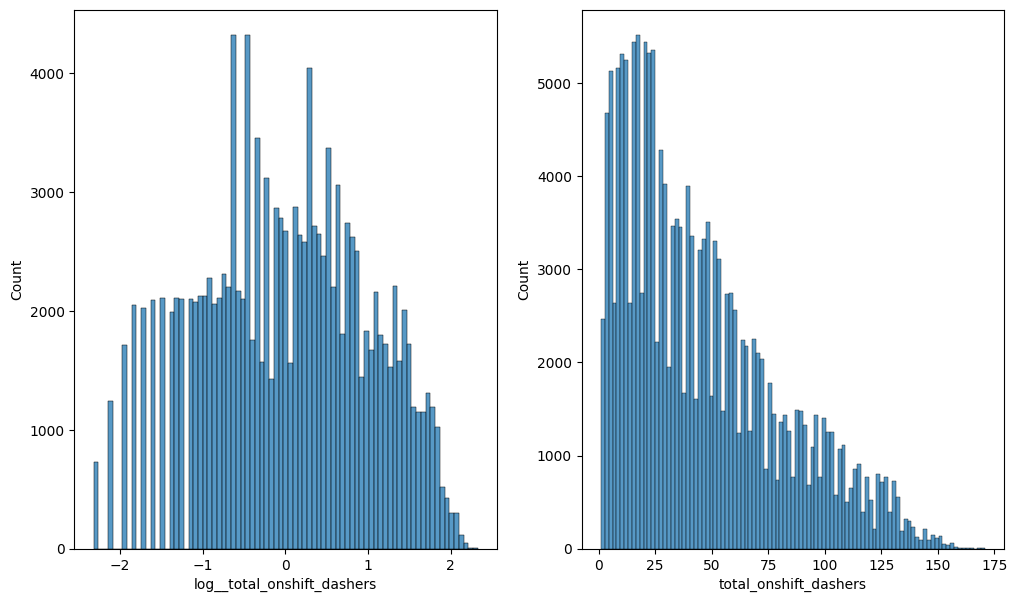

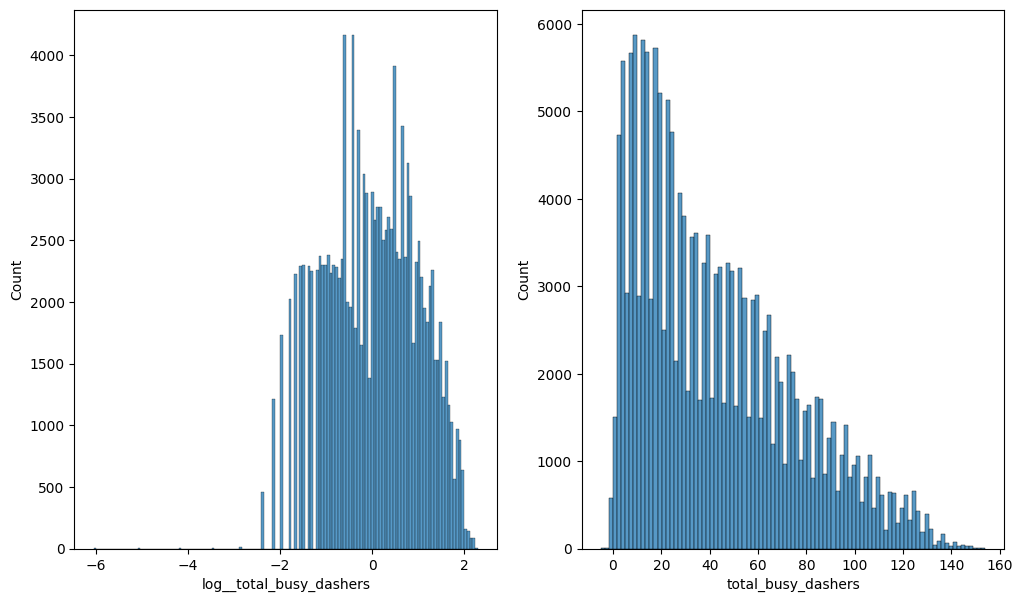

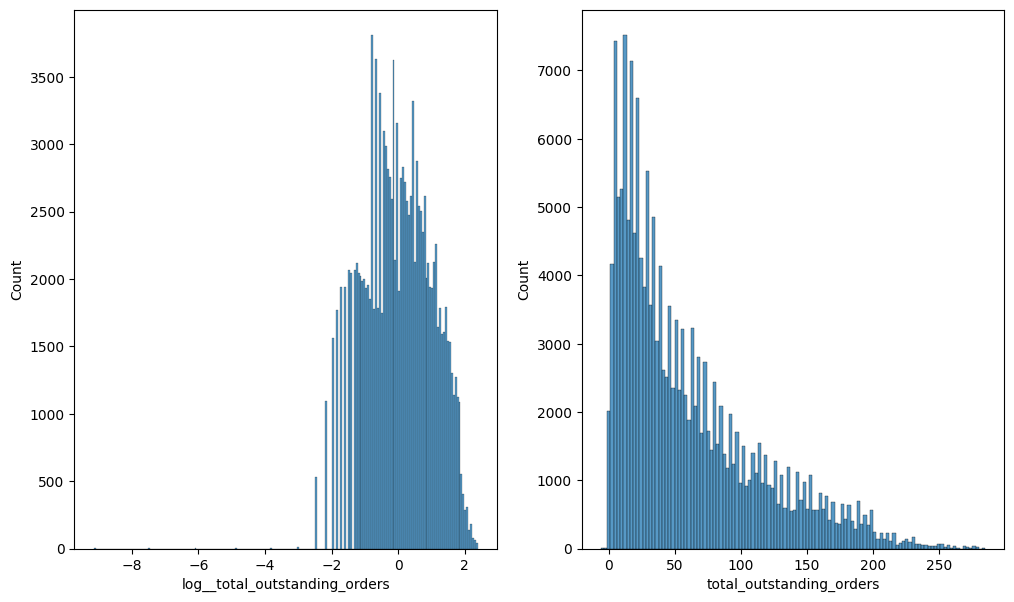

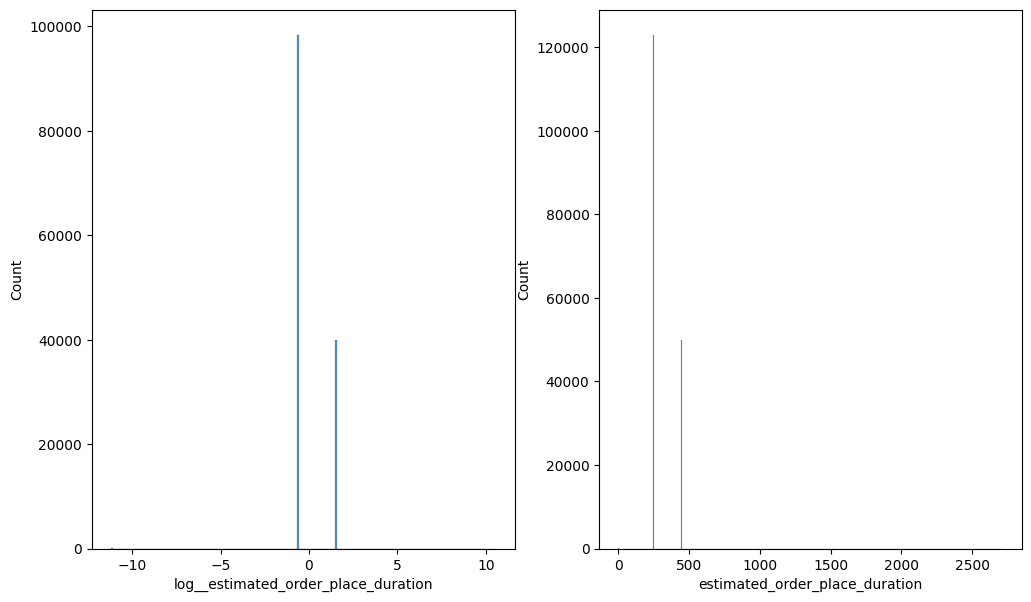

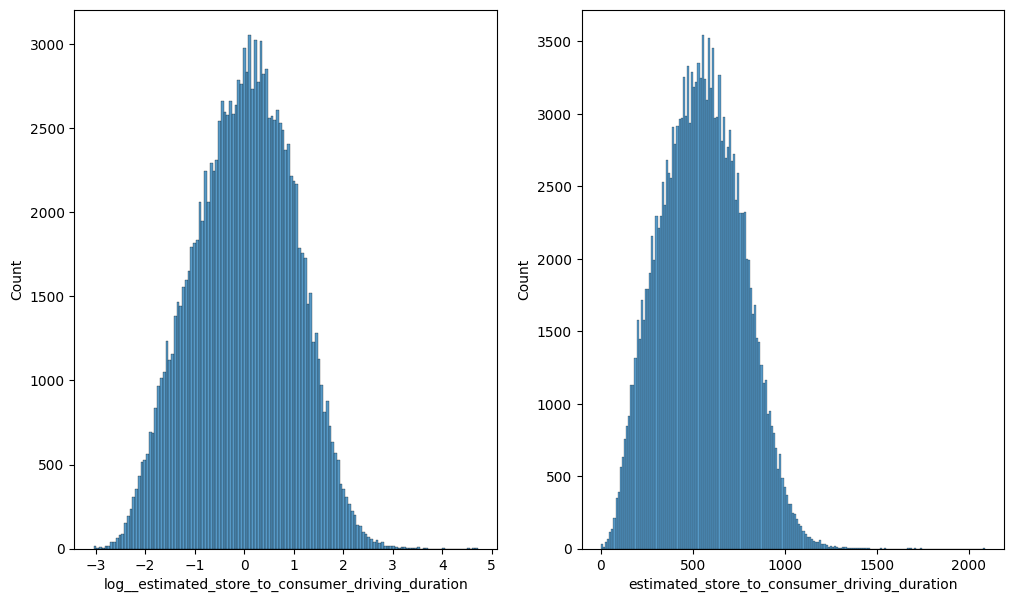

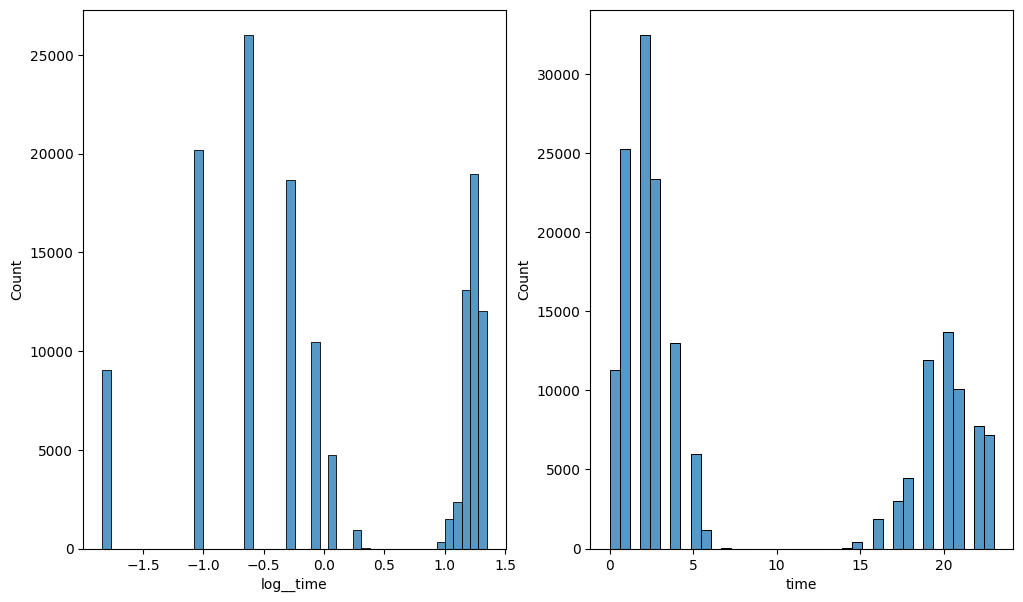

In [103]:
for i in range(len(log_cols)):
    plt.figure(figsize=(12,7))
    plt.subplot(1,2,1)
    sns.histplot(transformed_Xtrain_data[log_cols[i]])
    plt.subplot(1,2,2)
    sns.histplot(df1[features[i]])

# Observation 
1. As we can see for most of the skewed data distribution is normally distributed after `yeo-johnson` Transformation

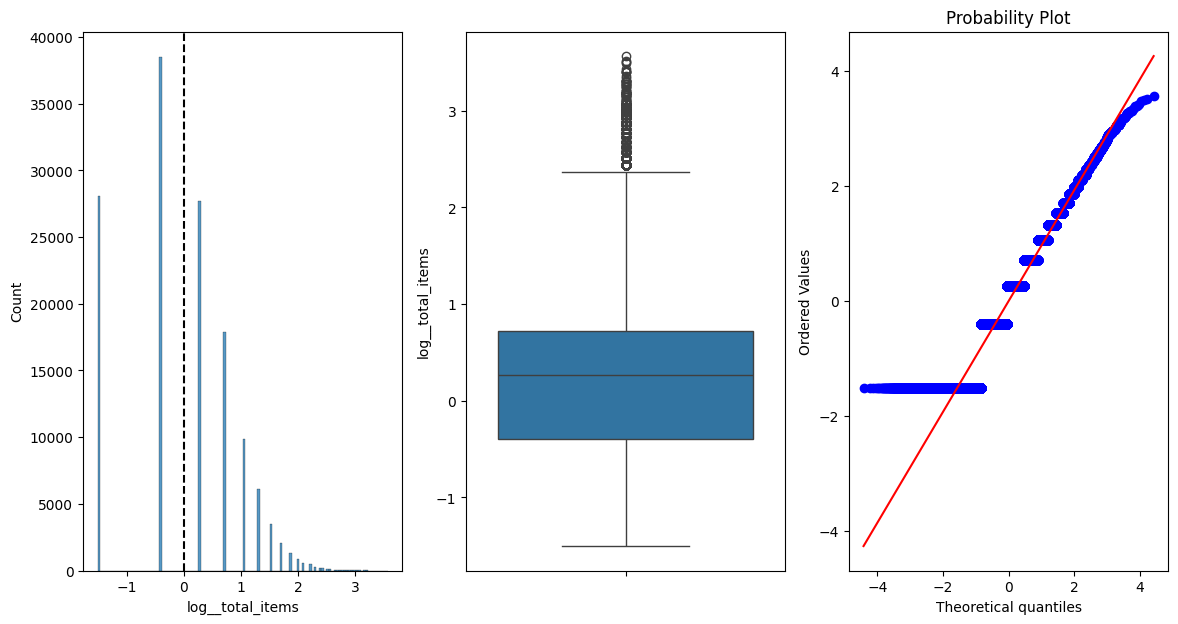

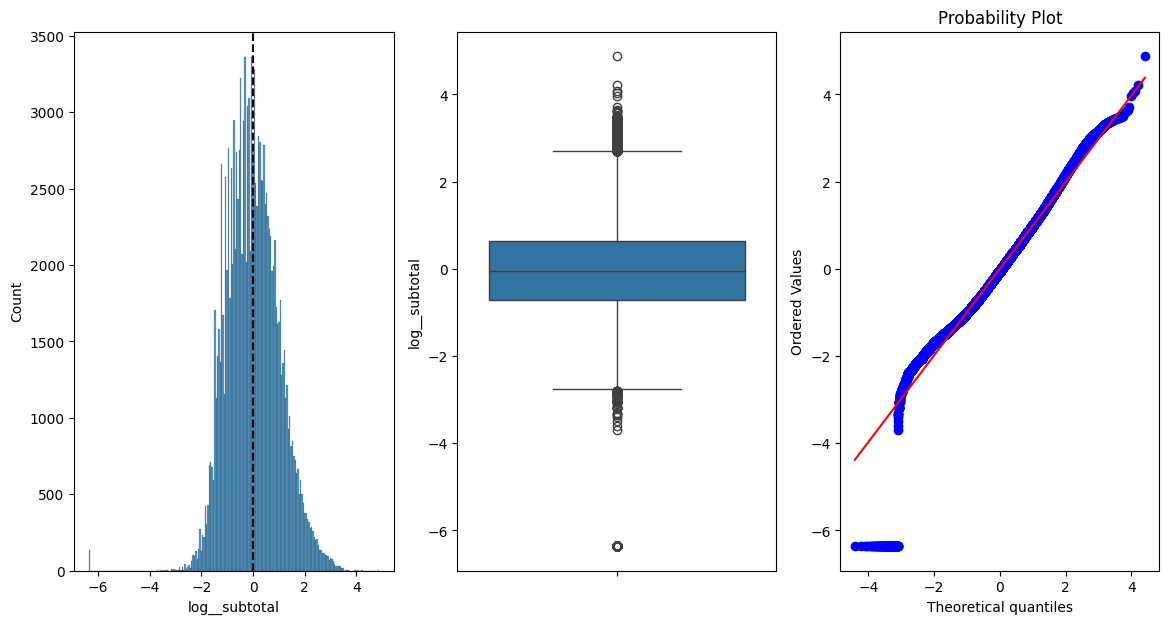

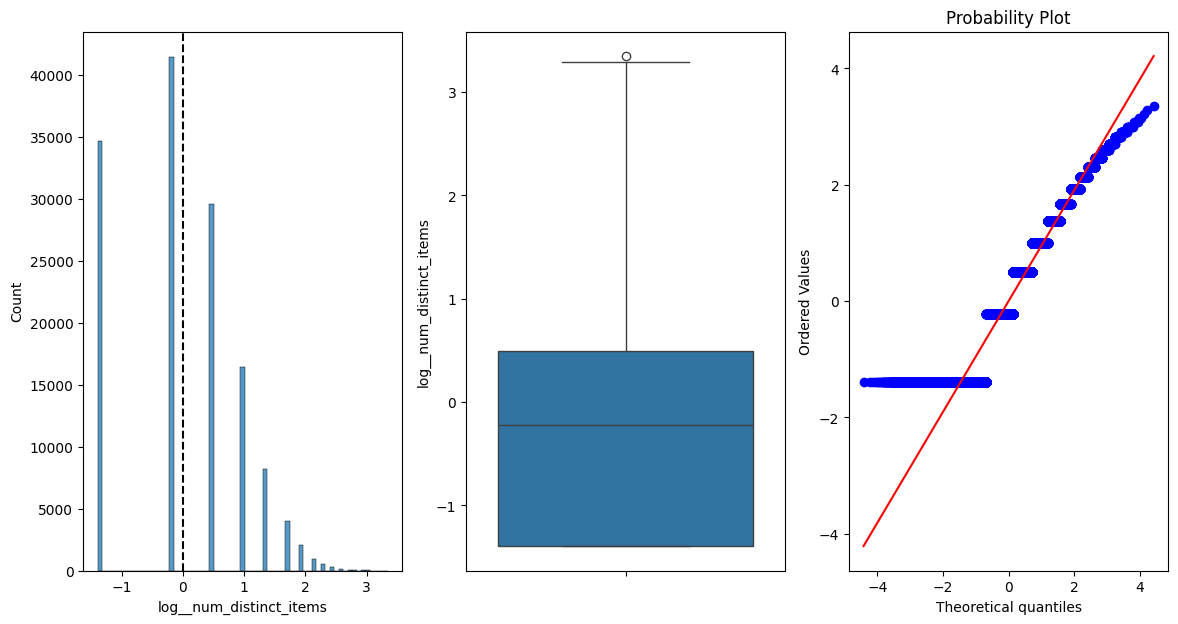

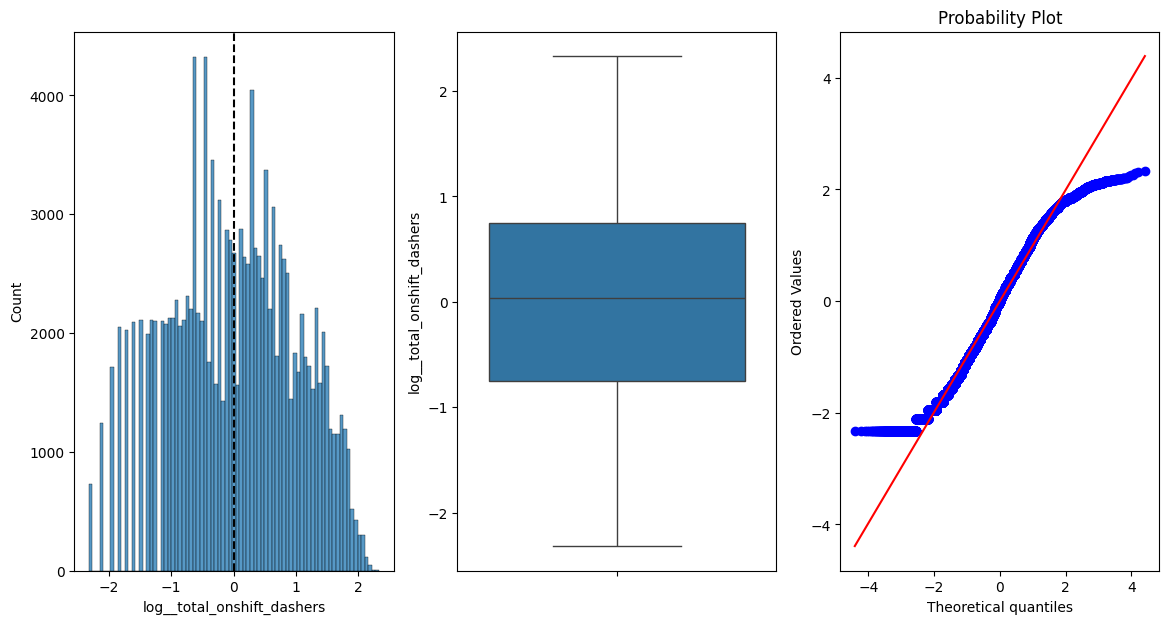

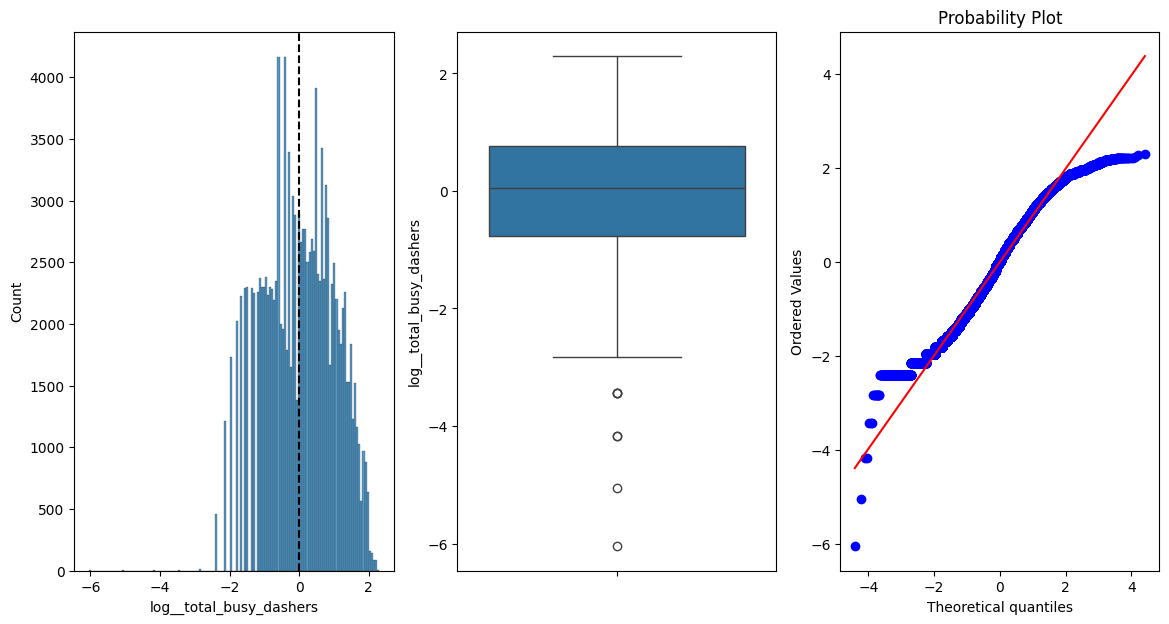

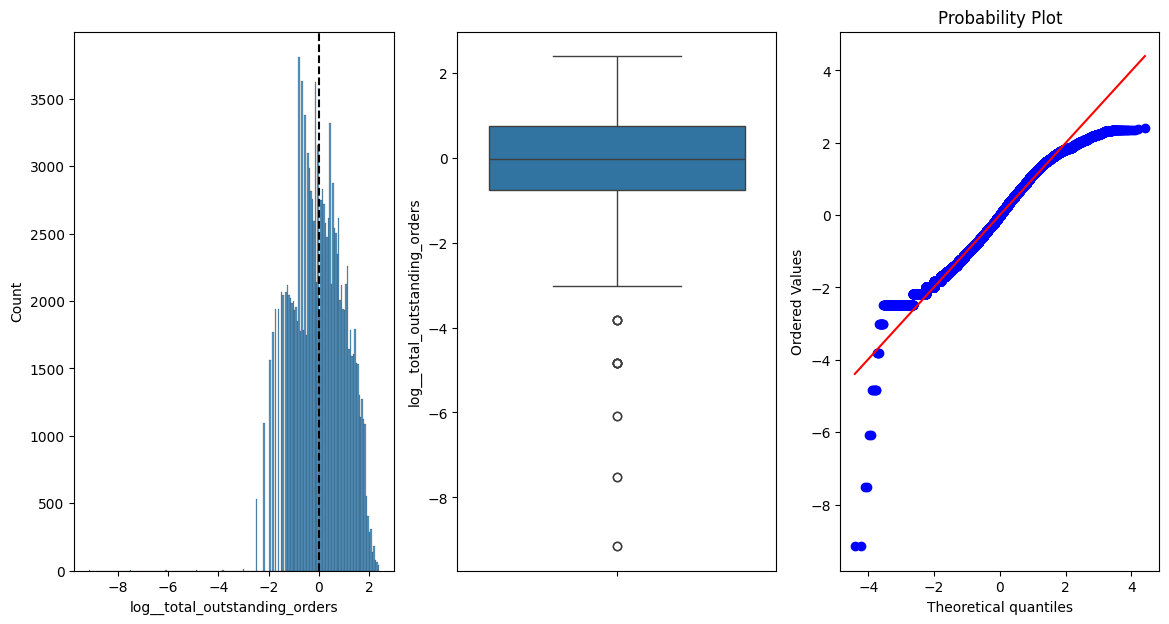

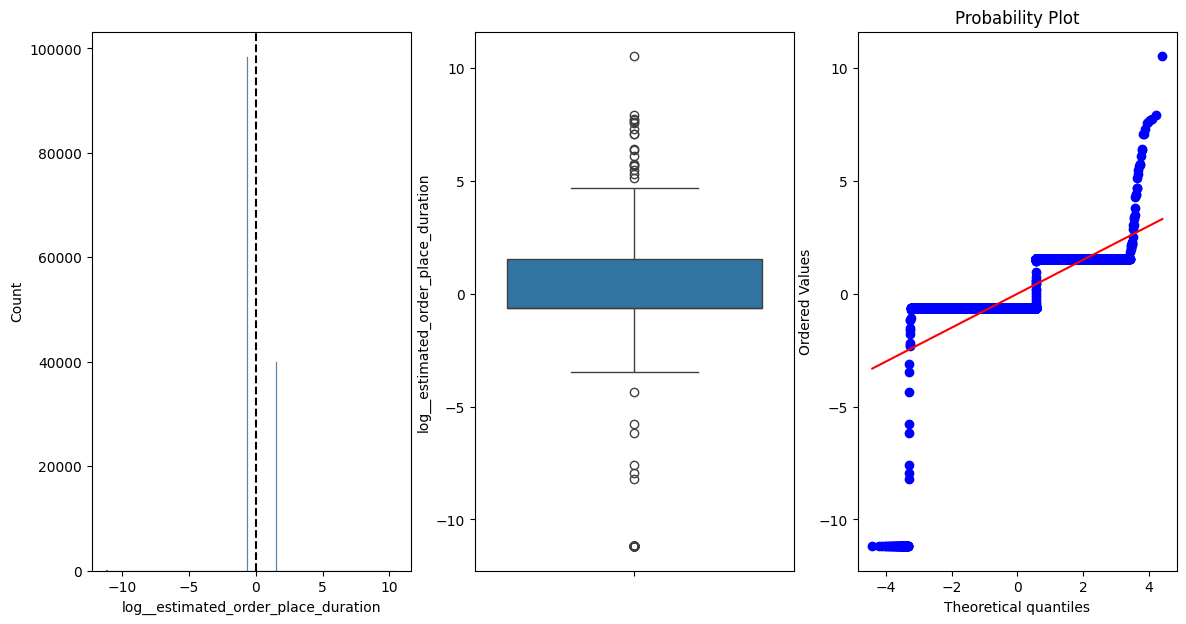

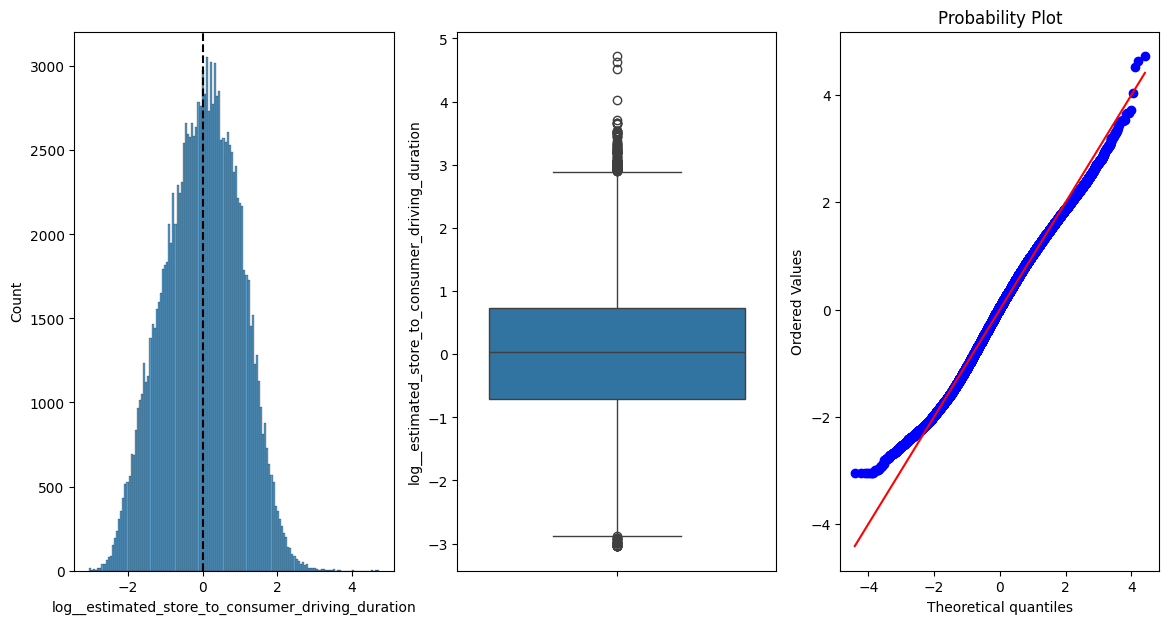

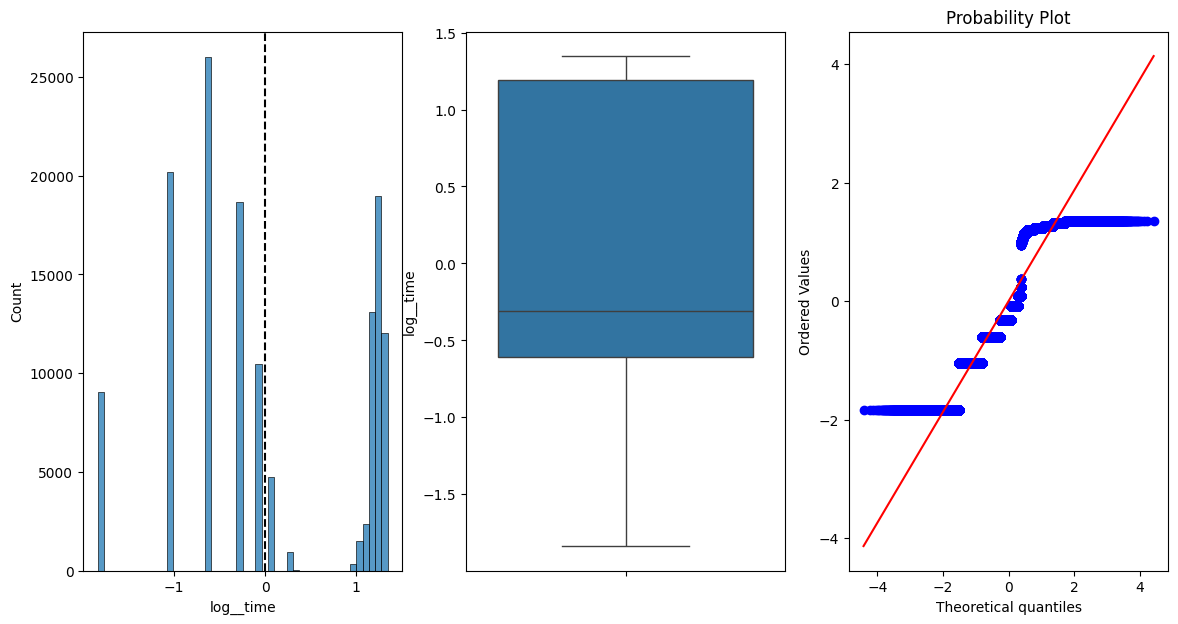

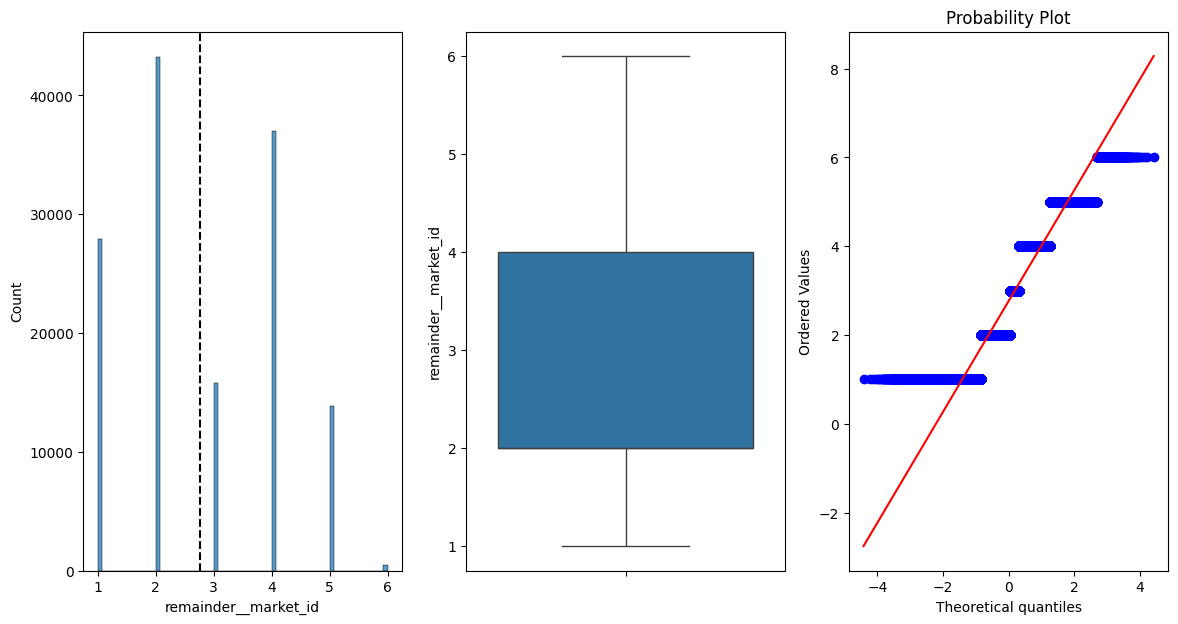

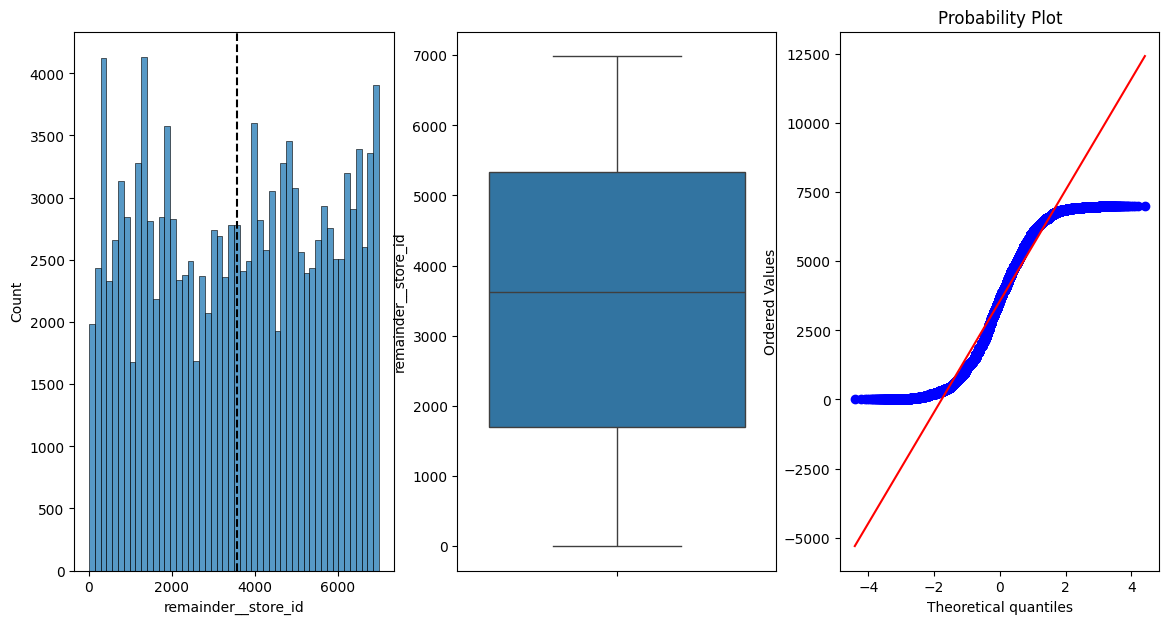

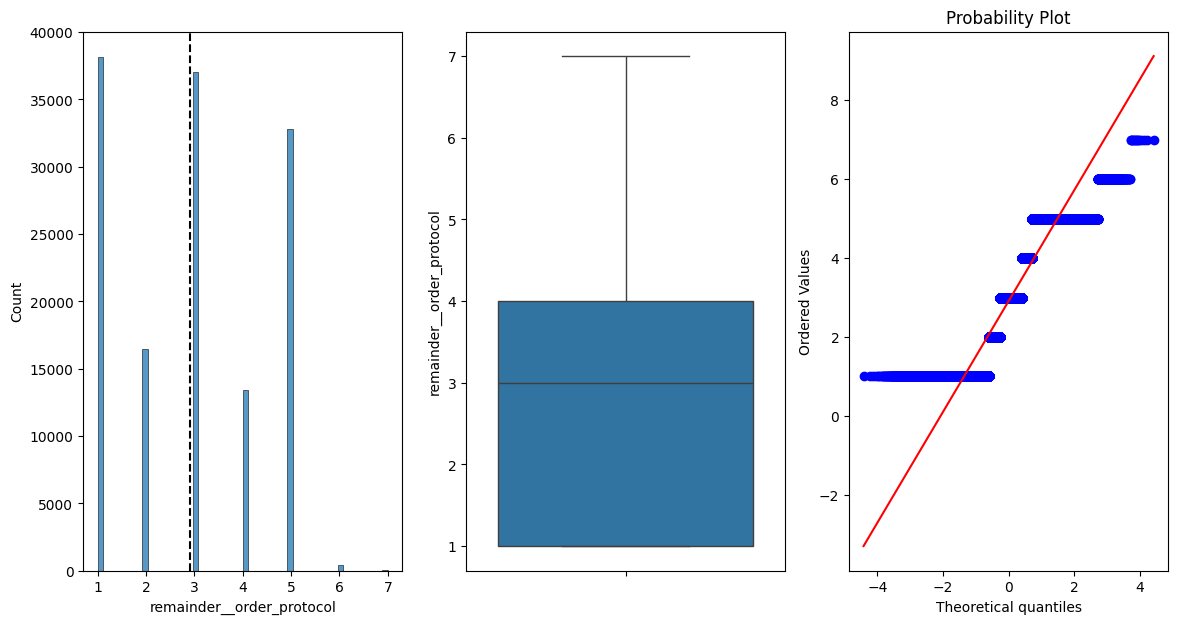

In [104]:
for key , val in transformed_Xtrain_data.items():
    if pd.api.types.is_numeric_dtype(val):
        plt.figure(figsize=(14,7))
        plt.subplot(1,3,1)
        sns.histplot(transformed_Xtrain_data[key])
        plt.axvline(transformed_Xtrain_data[key].mean(),color='k', linestyle='dashed')
        plt.subplot(1,3,2)
        sns.boxplot(transformed_Xtrain_data[key])
        plt.subplot(1,3,3)
        stat.probplot(transformed_Xtrain_data[key], plot=plt)

#### *From above plot we can see that there are still outliers* 
  

In [105]:
df1[df1["total_busy_dashers"] < 0] 

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_time,non_null_primary_category,time
7161,1.0,6172,3.0,1,1514,1,1.0,-1.0,3.0,251,650.0,3196.0,sandwich,15
22197,1.0,3264,3.0,1,1237,1,5.0,-1.0,7.0,251,466.0,1940.0,catering,5
24013,1.0,5266,1.0,6,5773,6,10.0,-1.0,6.0,446,552.0,3904.0,burger,3
30044,1.0,418,1.0,2,6083,2,9.0,-1.0,5.0,446,427.0,1571.0,steak,0
42835,3.0,1619,3.0,2,1859,2,6.0,-1.0,8.0,251,732.0,2348.0,indian,5
45355,1.0,1916,1.0,1,4314,1,9.0,-2.0,-5.0,446,738.0,2319.0,american,18
50961,3.0,272,1.0,2,1540,2,6.0,-1.0,3.0,446,380.0,2377.0,mexican,23
52574,1.0,6379,5.0,5,1900,5,5.0,-3.0,3.0,251,612.0,4733.0,sushi,19
52934,1.0,44,1.0,1,1661,1,2.0,-4.0,12.0,446,153.0,2928.0,sandwich,1
59692,1.0,4783,5.0,2,4342,1,2.0,-1.0,5.0,251,595.0,3254.0,pizza,1


In [106]:
df1["estimated_order_place_duration"].unique()

array([ 446,  251,    0,  528,   53,  148, 1153,  280, 1143,  168,  218,
        260,  505,  364,   32,  761,  312,  439,   20,  264,   15,  342,
        498,   72,  113, 1299,  448,  195,  576,  614,  880,  642,  244,
        732,  447,  521,  214, 1553, 1673, 1091,  440,  538,  176, 1012,
       1054, 1740,  921,  685,  567,  325,  341,   63,  100,  867,  873,
       1623,  213,  618,  373, 1238,  303,  795,  289,  186,  714,  385,
         71, 2715, 1310,   10,  851,  270,  532,  252, 1676,   54,  151,
         39,   59, 1127,  349, 1642,  695,   12,  317,  518,  192,  925,
        353, 1487,  156,  336,  485,  438], dtype=int64)

In [107]:
transformed_Xtrain_data["log__estimated_order_place_duration"].unique()

array([ -0.61152481,   1.52065367, -11.18223012,   5.32360823,
         5.12533312,   0.21839248,  -4.35942496,   4.69391848,
         0.49862063,   3.03492025,   0.73268658,  -2.32284982,
         0.16035622,   0.05409566,   5.76833809,  -1.16734002,
         1.8573322 ,  -7.9484945 ,   3.38284569,  -1.78583441,
         5.654431  ,  -2.16211425,   0.43281487,  -1.60967984,
         3.50268225,   1.46689974,   2.23687538,   4.42117694,
        -1.09013171,   4.38892162,   2.87017956,   2.02209793,
        -2.2618245 ,   2.50334403,   7.08248413,   5.72476014,
        -0.43600723,  10.53528285,   4.6733565 ,  -0.70889375,
        -0.48930398,  -1.50738917,  -1.15178979,   3.7890774 ,
         2.20558479,   2.15039205,  -5.76258179,   1.4488586 ,
         7.93561323,  -3.11460768,  -7.58812185,   1.52955941,
         0.57430032,   3.31877502,   0.94633925,  -0.11604027,
         0.61703205,  -3.45614239,  -8.22556469,   1.45788694,
         7.55364892,   7.617066  ,  -6.18012099,   2.12

<Axes: xlabel='log__estimated_order_place_duration', ylabel='Count'>

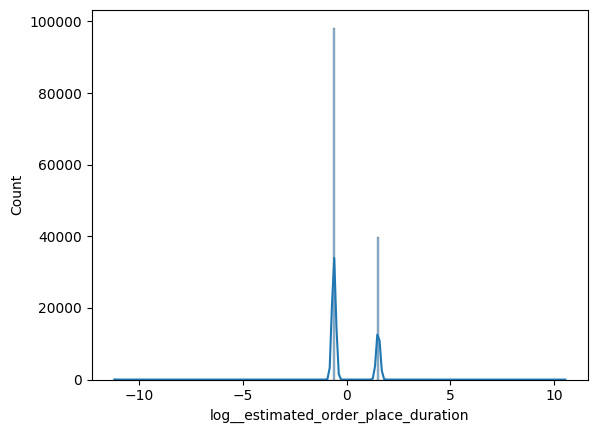

In [108]:
sns.histplot(transformed_Xtrain_data["log__estimated_order_place_duration"],kde=True)

In [109]:
upper_limit_opd = transformed_Xtrain_data["log__estimated_order_place_duration"].mean() + (3 * transformed_Xtrain_data["log__estimated_order_place_duration"].std())
lower_limit_opd = transformed_Xtrain_data["log__estimated_order_place_duration"].mean() - (3 * transformed_Xtrain_data["log__estimated_order_place_duration"].std())

In [110]:
upper_limit_opd , lower_limit_opd

(3.000010844791156, -3.000010844791157)

In [111]:
transformed_Xtrain_data[transformed_Xtrain_data["log__estimated_order_place_duration"] < -3][:15]

,log__total_items,log__subtotal,log__num_distinct_items,log__total_onshift_dashers,log__total_busy_dashers,log__total_outstanding_orders,log__estimated_order_place_duration,log__estimated_store_to_consumer_driving_duration,log__time,remainder__market_id,remainder__store_id,remainder__order_protocol,remainder__non_null_primary_category
113027,-1.504158,-0.257477,-1.394317,1.365540,1.531318,1.026919,-11.182230,0.995148,-0.610146,4.0,1961,3.0,pizza
54402,0.266858,0.313277,0.494195,-2.111240,-1.955778,-1.976658,-11.182230,2.192877,1.273931,3.0,4503,2.0,seafood
40692,2.101377,-0.627693,1.921437,1.771130,1.445733,1.283418,-11.182230,-1.399403,-1.046164,2.0,777,4.0,fast
16095,-0.397105,-0.739833,-1.394317,-1.237975,-1.294463,-1.319628,-11.182230,-0.407149,1.347267,2.0,4861,4.0,alcohol
134621,0.721996,1.017513,0.997950,-1.809575,-1.680261,-1.693074,-11.182230,-0.717100,-0.610146,3.0,1322,3.0,pizza
23281,0.721996,-0.709625,0.997950,0.474650,0.287164,0.113779,-11.182230,0.319679,1.311483,2.0,1311,3.0,american
55012,-1.504158,-0.373854,-1.394317,0.063996,0.199144,-0.019114,-11.182230,2.094321,1.273931,4.0,5993,2.0,italian
26237,1.860077,1.586803,2.126663,-0.651475,-0.671519,-0.599865,-11.182230,-0.572804,-0.610146,5.0,3028,5.0,thai
170052,-1.504158,-1.464766,-1.394317,-0.030446,0.228921,0.291753,-11.182230,-0.721949,1.273931,2.0,2069,3.0,american
140885,-1.504158,-1.863033,-1.394317,-0.164930,-0.238079,-0.066521,-11.182230,1.815704,-0.610146,5.0,1756,1.0,mexican


In [112]:

def count_outliers(data,col):
        q1 = data[col].quantile(0.25,interpolation='nearest')
        q2 = data[col].quantile(0.5,interpolation='nearest')
        q3 = data[col].quantile(0.75,interpolation='nearest')
        q4 = data[col].quantile(1,interpolation='nearest')
        IQR = q3 -q1
        global LLP
        global ULP
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers in",col)
        else:
            print("There are outliers in",col)
            x = data[data[col]<LLP][col].size
            y = data[data[col]>ULP][col].size
            a.append(col)
            print('Count of outliers are:',x+y)
global a
a = []
for key , val in transformed_Xtrain_data.items():
    if pd.api.types.is_numeric_dtype(val):
        count_outliers(transformed_Xtrain_data,key)

There are outliers in log__total_items
Count of outliers are: 800
There are outliers in log__subtotal
Count of outliers are: 1154
There are outliers in log__num_distinct_items
Count of outliers are: 1
No outliers in log__total_onshift_dashers
There are outliers in log__total_busy_dashers
Count of outliers are: 7
There are outliers in log__total_outstanding_orders
Count of outliers are: 16
There are outliers in log__estimated_order_place_duration
Count of outliers are: 87
There are outliers in log__estimated_store_to_consumer_driving_duration
Count of outliers are: 132
No outliers in log__time
No outliers in remainder__market_id
No outliers in remainder__store_id
No outliers in remainder__order_protocol


In [113]:
def treat_outlier_iqr(df, col):

    percentile_25 = df[col].quantile(0.25)
    percentile_75 = df[col].quantile(0.75)
    IQR = percentile_75 - percentile_25 
    upper_limit = percentile_75 + 1.5 * IQR 
    lower_limit = percentile_25 - 1.5 * IQR 

    user = input("Trim or Capping").lower()
    if user == "trim":
        x = df[df[col] > upper_limit].index.tolist()
        y = df[df[col] < lower_limit].index.tolist()
        df.drop(x+y,inplace=True)

    else:
        df[col] = np.where(df[col] > upper_limit, upper_limit, np.where(df[col] < lower_limit, lower_limit, df[col]))

    print("Operation Performed")
    return df[df[col] < upper_limit]



In [114]:
transformed_Xtrain_data.head().T

,153856,90925,44115,2254,154330
log__total_items,-0.397105,1.059156,0.266858,-1.504158,1.710643
log__subtotal,0.060429,1.333535,-0.833721,-1.176881,-0.108714
log__num_distinct_items,-0.226018,0.99795,-0.226018,-1.394317,0.99795
log__total_onshift_dashers,1.77113,-0.130303,-0.802265,-1.237975,-1.947308
log__total_busy_dashers,1.864183,-0.092059,-0.722374,-1.143116,-1.806808
log__total_outstanding_orders,1.879046,-0.090882,-0.677123,-0.492981,-1.976658
log__estimated_order_place_duration,-0.611525,1.520654,1.520654,1.520654,1.520654
log__estimated_store_to_consumer_driving_duration,0.01176,-0.942984,-2.039182,1.02036,0.235641
log__time,-0.610146,1.273931,1.311483,-0.087514,1.1928
remainder__market_id,4.0,2.0,6.0,1.0,3.0


# Encoding 

In [115]:
from category_encoders import BaseNEncoder 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,PowerTransformer,TargetEncoder
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import Pipeline 

In [116]:
transformed_Xtrain_data.columns

Index(['log__total_items', 'log__subtotal', 'log__num_distinct_items',
       'log__total_onshift_dashers', 'log__total_busy_dashers',
       'log__total_outstanding_orders', 'log__estimated_order_place_duration',
       'log__estimated_store_to_consumer_driving_duration', 'log__time',
       'remainder__market_id', 'remainder__store_id',
       'remainder__order_protocol', 'remainder__non_null_primary_category'],
      dtype='object')

In [117]:
cat_features = ['remainder__order_protocol','remainder__market_id']
cat_imputer = Pipeline(steps=[
    ("one_hot", OneHotEncoder(handle_unknown='ignore',sparse_output=False)) 
])

target_features = ['remainder__non_null_primary_category']
target_imputer = Pipeline(steps=[
    ("target", TargetEncoder(cv=5,smooth=500,target_type='continuous'))
])

power_features = ['remainder__store_id']
power_imputer = Pipeline(steps=[
    ("log" , PowerTransformer(method='yeo-johnson'))
])

CT = ColumnTransformer(transformers=[
    ("one_hot", cat_imputer, cat_features),
    ("target", target_imputer, target_features),
    ("log", power_imputer, power_features)
],remainder='passthrough')


transformer_2 = Pipeline(steps=[("transform", CT)])
transformer_2.set_output(transform='pandas')

transformed_X_train = transformer_2.fit_transform(transformed_Xtrain_data, y_train)
transformed_X_test = transformer_2.transform(transformed_Xtest_data)
transformed_X_train

,one_hot__remainder__order_protocol_1.0,one_hot__remainder__order_protocol_2.0,one_hot__remainder__order_protocol_3.0,one_hot__remainder__order_protocol_4.0,one_hot__remainder__order_protocol_5.0,one_hot__remainder__order_protocol_6.0,one_hot__remainder__order_protocol_7.0,one_hot__remainder__market_id_1.0,one_hot__remainder__market_id_2.0,one_hot__remainder__market_id_3.0,...,log__remainder__store_id,remainder__log__total_items,remainder__log__subtotal,remainder__log__num_distinct_items,remainder__log__total_onshift_dashers,remainder__log__total_busy_dashers,remainder__log__total_outstanding_orders,remainder__log__estimated_order_place_duration,remainder__log__estimated_store_to_consumer_driving_duration,remainder__log__time
153856,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.458630,-0.397105,0.060429,-0.226018,1.771130,1.864183,1.879046,-0.611525,0.011760,-0.610146
90925,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.715083,1.059156,1.333535,0.997950,-0.130303,-0.092059,-0.090882,1.520654,-0.942984,1.273931
44115,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.230720,0.266858,-0.833721,-0.226018,-0.802265,-0.722374,-0.677123,1.520654,-2.039182,1.311483
2254,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.820917,-1.504158,-1.176881,-1.394317,-1.237975,-1.143116,-0.492981,1.520654,1.020360,-0.087514
154330,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.780491,1.710643,-0.108714,0.997950,-1.947308,-1.806808,-1.976658,1.520654,0.235641,1.192800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122277,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-1.315579,-0.397105,-0.785102,-0.226018,-0.856352,-1.216351,-1.179298,-0.611525,0.425064,0.092099
105828,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.959285,0.266858,-0.432779,0.494195,-1.485958,-1.469352,-1.485907,1.520654,-1.527911,1.234437
134648,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.471527,-1.504158,-0.462970,-1.394317,0.474650,0.530465,0.968199,-0.611525,-1.002925,-0.610146
149826,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-1.540632,0.266858,0.167368,0.494195,0.855425,0.839513,0.681142,-0.611525,-0.402456,-1.046164


In [118]:
transformed_X_train.shape

(138316, 24)

In [119]:
transformed_X_train.T

,153856,90925,44115,2254,154330,32736,96513,89473,171279,1630,...,89332,171781,140094,56060,112496,122277,105828,134648,149826,124420
one_hot__remainder__order_protocol_1.0,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
one_hot__remainder__order_protocol_2.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
one_hot__remainder__order_protocol_3.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
one_hot__remainder__order_protocol_4.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
one_hot__remainder__order_protocol_5.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
one_hot__remainder__order_protocol_6.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
one_hot__remainder__order_protocol_7.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
one_hot__remainder__market_id_1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
one_hot__remainder__market_id_2.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
one_hot__remainder__market_id_3.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [120]:
transformed_X_train.corr()

,one_hot__remainder__order_protocol_1.0,one_hot__remainder__order_protocol_2.0,one_hot__remainder__order_protocol_3.0,one_hot__remainder__order_protocol_4.0,one_hot__remainder__order_protocol_5.0,one_hot__remainder__order_protocol_6.0,one_hot__remainder__order_protocol_7.0,one_hot__remainder__market_id_1.0,one_hot__remainder__market_id_2.0,one_hot__remainder__market_id_3.0,...,log__remainder__store_id,remainder__log__total_items,remainder__log__subtotal,remainder__log__num_distinct_items,remainder__log__total_onshift_dashers,remainder__log__total_busy_dashers,remainder__log__total_outstanding_orders,remainder__log__estimated_order_place_duration,remainder__log__estimated_store_to_consumer_driving_duration,remainder__log__time
one_hot__remainder__order_protocol_1.0,1.000000,-0.227018,-0.373199,-0.201972,-0.343938,-0.034733,-0.006207,0.128084,-0.108373,0.129246,...,0.027301,-0.003867,0.050121,0.010498,-0.189789,-0.193083,-0.182357,0.878574,-0.022780,-0.023318
one_hot__remainder__order_protocol_2.0,-0.227018,1.000000,-0.222592,-0.120465,-0.205140,-0.020716,-0.003702,-0.078455,0.027410,-0.035847,...,-0.032923,-0.001972,0.003102,-0.005781,0.023479,0.023094,0.022970,-0.215848,0.029084,0.029532
one_hot__remainder__order_protocol_3.0,-0.373199,-0.222592,1.000000,-0.198034,-0.337232,-0.034055,-0.006086,-0.085777,0.054569,-0.074169,...,-0.018223,0.013749,0.074276,0.032859,0.121135,0.122827,0.119854,-0.353434,0.042869,-0.022597
one_hot__remainder__order_protocol_4.0,-0.201972,-0.120465,-0.198034,1.000000,-0.182507,-0.018431,-0.003294,0.033218,-0.062257,0.046030,...,0.003900,0.056343,-0.205591,0.003852,-0.120409,-0.121718,-0.124752,-0.109424,-0.036636,0.058225
one_hot__remainder__order_protocol_5.0,-0.343938,-0.205140,-0.337232,-0.182507,1.000000,-0.031385,-0.005609,-0.014620,0.081015,-0.062799,...,0.011064,-0.044828,0.013662,-0.039280,0.141621,0.144393,0.138478,-0.325020,-0.017223,-0.016030
one_hot__remainder__order_protocol_6.0,-0.034733,-0.020716,-0.034055,-0.018431,-0.031385,1.000000,-0.000566,0.046776,-0.010710,-0.002778,...,0.012753,-0.022684,-0.023166,-0.031493,-0.017369,-0.016166,-0.016888,0.080665,0.000237,0.007902
one_hot__remainder__order_protocol_7.0,-0.006207,-0.003702,-0.006086,-0.003294,-0.005609,-0.000566,1.000000,-0.005061,-0.006782,-0.003611,...,-0.003365,-0.004274,-0.001665,-0.003532,-0.009973,-0.011214,-0.009453,-0.006153,-0.008619,0.001428
one_hot__remainder__market_id_1.0,0.128084,-0.078455,-0.085777,0.033218,-0.014620,0.046776,-0.005061,1.000000,-0.339075,-0.180510,...,-0.045316,0.003293,0.007729,-0.000515,-0.301912,-0.278117,-0.262045,0.135907,-0.065153,0.012604
one_hot__remainder__market_id_2.0,-0.108373,0.027410,0.054569,-0.062257,0.081015,-0.010710,-0.006782,-0.339075,1.000000,-0.241902,...,-0.006211,-0.019062,-0.018671,-0.023355,0.334727,0.334654,0.322878,-0.114320,0.062301,0.004995
one_hot__remainder__market_id_3.0,0.129246,-0.035847,-0.074169,0.046030,-0.062799,-0.002778,-0.003611,-0.180510,-0.241902,1.000000,...,0.001537,-0.005342,-0.022728,-0.007609,-0.309868,-0.310849,-0.321309,0.130816,-0.015117,0.007361


In [121]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [122]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(transformed_X_train, y_train)


LinearRegression()

In [123]:
some_data = transformed_X_train.iloc[:5]
some_data

,one_hot__remainder__order_protocol_1.0,one_hot__remainder__order_protocol_2.0,one_hot__remainder__order_protocol_3.0,one_hot__remainder__order_protocol_4.0,one_hot__remainder__order_protocol_5.0,one_hot__remainder__order_protocol_6.0,one_hot__remainder__order_protocol_7.0,one_hot__remainder__market_id_1.0,one_hot__remainder__market_id_2.0,one_hot__remainder__market_id_3.0,...,log__remainder__store_id,remainder__log__total_items,remainder__log__subtotal,remainder__log__num_distinct_items,remainder__log__total_onshift_dashers,remainder__log__total_busy_dashers,remainder__log__total_outstanding_orders,remainder__log__estimated_order_place_duration,remainder__log__estimated_store_to_consumer_driving_duration,remainder__log__time
153856,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.458630,-0.397105,0.060429,-0.226018,1.771130,1.864183,1.879046,-0.611525,0.011760,-0.610146
90925,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.715083,1.059156,1.333535,0.997950,-0.130303,-0.092059,-0.090882,1.520654,-0.942984,1.273931
44115,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.230720,0.266858,-0.833721,-0.226018,-0.802265,-0.722374,-0.677123,1.520654,-2.039182,1.311483
2254,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.820917,-1.504158,-1.176881,-1.394317,-1.237975,-1.143116,-0.492981,1.520654,1.020360,-0.087514
154330,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.780491,1.710643,-0.108714,0.997950,-1.947308,-1.806808,-1.976658,1.520654,0.235641,1.192800


In [124]:
some_data = transformed_X_train.iloc[:10]
some_labels = y_train.iloc[:10]
# some_data_prepared = full_pipeline.transform(some_data)
some_data_prepared = transformed_X_test.iloc[:10]
print("Predictions:", lin_reg.predict(some_data_prepared))

# Predictions: [ 210644.6045 317768.8069 210956.4333 59218.9888 189747.5584]
print("Labels:", list(some_labels))
# Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


Predictions: [3473.31835938 2817.89257812 3753.77148438 2996.08789062 2815.65429688
 3590.62890625 3119.79882812 2374.32421875 2738.         3696.71289062]
Labels: [4626.0, 3269.0, 2022.0, 4812.0, 5138.0, 2159.0, 2884.0, 1777.0, 1274.0, 1255.0]


In [125]:
y_predictions = lin_reg.predict(some_data_prepared)
lin_mse = mean_squared_error(some_labels, y_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_mae = mean_absolute_error(some_labels,y_predictions)
print(f"RMSE : {lin_rmse}")
print(f"MAE : {lin_mae}")


RMSE : 1542.376353997371
MAE : 1364.4283203125


In [126]:
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.svm import SVR 
# from sklearn.linear_model import LinearRegression

In [127]:
# models = {
#     "RandomForestRegressor" : RandomForestRegressor(),
#     "GradientBoostingRegressor" : GradientBoostingRegressor(),
#     # "SVR" : SVR(),
#     # "LinearRegression" : LinearRegression()
# }

In [128]:
# RMSE = {}
# MAE = {}
# for key , val in models.items():
#     val.fit(transformed_X_train,y_train)
#     y_preds = val.predict(transformed_X_test)
#     rmse = np.sqrt(mean_squared_error(y_test,y_preds))
#     mae = mean_absolute_error(y_test,y_preds)
#     RMSE[key] = rmse
#     MAE[key] = mae 
#     print(f"RMSE : {key} : {rmse}")
#     print(f"MAE {key} : {mae}")


In [129]:
# from sklearn.model_selection import cross_val_score
# rf_cv = np.mean(cross_val_score(RandomForestRegressor(), transformed_X_train, y_train,cv=5))
# rf_cv

In [130]:
# rf = RandomForestRegressor().fit(transformed_X_train,y_train)

# rf.score(transformed_X_test,y_test)